## Top 5000 Spotify Data Sci
- @RodrigoLaraG
- 25/07

## Plans/Progress


- EDA
- define major parameters to rank/analyze data
    - `avg_rat`
    - `num_revs`
    - `num_rat`
- **Correlation c/ Music Descriptors**
- develop a ML algorithm to find/recognize patterns that help albuns be more popular/better reviewed, or find genre by descriptors
- some NLP to guess genres based on descriptors

### Ideas

- in-depth exploration of *1969 to 1975* and *1994 to 1998* periods
- in-depth exploration of `num_rat_log` < 1 & `avg_rat` > 3,9
- in-depth exploration of top XXX (i.e. top 500/ to p10%) most popular artists

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
dfs = pd.read_csv("Top5000.csv")

In [4]:
dfs.head(10)

Unnamed: 0                       ars_name           rel_date  \
0           0                      Radiohead       16 June 1997   
1           1                     Pink Floyd  12 September 1975   
2           2                   King Crimson    10 October 1969   
3           3                      Radiohead     3 October 2000   
4           4                 Kendrick Lamar      15 March 2015   
5           5            My Bloody Valentine    4 November 1991   
6           6                     Pink Floyd      23 March 1973   
7           7                    The Beatles  26 September 1969   
8           8  The Velvet Underground & Nico      12 March 1967   
9           9                    David Bowie       16 June 1972   

                                              gens  \
0                       Alternative Rock, Art Rock   
1                       Progressive Rock, Art Rock   
2                       Progressive Rock, Art Rock   
3          Art Rock, Experimental Rock, Electronic   
4  Conscious Hip Hop, West Coast Hip Hop, Jazz Rap   
5                              Shoegaze, Noise Pop   
6                       Art Rock, Progressive Rock   
7                                         Pop Rock   
8                      Art Rock, Experimental Rock   
9                              Glam Rock, Pop Rock   

                                               descs  avg_rat num_rat  \
0  melancholic, anxious, futuristic, alienation, ...     4.23  70,382   
1  melancholic, atmospheric, progressive, male vo...     4.29  48,662   
2  fantasy, epic, progressive, philosophical, com...     4.30  44,943   
3  cold, melancholic, futuristic, atmospheric, an...     4.21  58,590   
4  political, conscious, poetic, protest, concept...     4.27  44,206   
5  noisy, ethereal, atmospheric, romantic, dense,...     4.24  49,887   
6  philosophical, atmospheric, introspective, exi...     4.20  57,622   
7  melodic, warm, male vocals, bittersweet, summe...     4.25  44,544   
8  drugs, sexual, raw, urban, noisy, nihilistic, ...     4.23  45,570   
9  science fiction, melodic, anthemic, concept al...     4.26  39,501   

   num_revs                                              album  acousticness  \
0      1531                                        OK Computer      0.135763   
1       983                                 Wish You Were Here      0.602800   
2       870                   In the Court of the Crimson King      0.297686   
3       734                                              Kid A      0.123219   
4       379                                To Pimp a Butterfly      0.322889   
5      1223                                           Loveless      0.185593   
6      1549                          The Dark Side of the Moon      0.390310   
7       961                                         Abbey Road      0.224964   
8       929                      The Velvet Underground & Nico      0.267295   
9       721  The Rise and Fall of Ziggy Stardust and the Sp...      0.178727   

   danceability    energy  instrumentalness  liveness   loudness  speechiness  \
0      0.288083  0.565917          0.161053  0.159375  -9.102417     0.056308   
1      0.373600  0.409800          0.363040  0.384940 -12.689400     0.039740   
2      0.340625  0.370475          0.327265  0.149138 -14.873125     0.043463   
3      0.601294  0.676706          0.000669  0.311412  -7.811941     0.268318   
4      0.590750  0.707625          0.000011  0.318419  -5.802062     0.294175   
5      0.227009  0.615364          0.787091  0.238555 -13.224727     0.049436   
6      0.383000  0.400450          0.595929  0.237680 -15.701900     0.058660   
7      0.518000  0.457176          0.122802  0.177718 -11.344412     0.047312   
8      0.428545  0.548818          0.329939  0.098436 -11.624364     0.054445   
9      0.502727  0.529091          0.003446  0.210082 -10.998545     0.041927   

        tempo   valence    duration_ms  time_signature  
0  115.450750  0.291733  268435.5000

In [5]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402 entries, 0 to 4401
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4402 non-null   int64  
 1   ars_name          4402 non-null   object 
 2   rel_date          4402 non-null   object 
 3   gens              4402 non-null   object 
 4   descs             4304 non-null   object 
 5   avg_rat           4402 non-null   float64
 6   num_rat           4402 non-null   object 
 7   num_revs          4402 non-null   int64  
 8   album             4402 non-null   object 
 9   acousticness      4402 non-null   float64
 10  danceability      4402 non-null   float64
 11  energy            4402 non-null   float64
 12  instrumentalness  4402 non-null   float64
 13  liveness          4402 non-null   float64
 14  loudness          4402 non-null   float64
 15  speechiness       4402 non-null   float64
 16  tempo             4402 non-null   float64


In [6]:
dfs.describe()

Unnamed: 0      avg_rat     num_revs  acousticness  danceability  \
count  4402.000000  4402.000000  4402.000000  4.402000e+03   4402.000000   
mean   2200.500000     3.771320    76.538846  3.384089e-01      0.477338   
std    1270.892272     0.100606   112.977848  2.880880e-01      0.158556   
min       0.000000     3.520000     0.000000  6.609091e-07      0.074900   
25%    1100.250000     3.700000    16.000000  9.173208e-02      0.369511   
50%    2200.500000     3.750000    39.000000  2.613944e-01      0.473867   
75%    3300.750000     3.810000    91.000000  5.439500e-01      0.584472   
max    4401.000000     4.340000  1549.000000  9.960000e-01      0.946000   

            energy  instrumentalness     liveness     loudness  speechiness  \
count  4402.000000       4402.000000  4402.000000  4402.000000  4402.000000   
mean      0.575443          0.250817     0.201108   -10.674275     0.087147   
std       0.226569          0.286694     0.096184     5.197312     0.081774   
min       0.002360          0.000000     0.032100   -45.267000     0.026200   
25%       0.422866          0.009679     0.138433   -13.054771     0.041927   
50%       0.598767          0.126991     0.179018    -9.590507     0.055399   
75%       0.746233          0.423197     0.238470    -7.031358     0.094167   
max       1.000000          0.993000     0.937000     0.942625     0.944000   

             tempo      valence   duration_ms  time_signature  
count  4402.000000  4402.000000  4.402000e+03     4402.000000  
mean    119.290332     0.424103  2.849496e+05        3.855067  
std      14.933975     0.200978  1.957019e+05        0.226416  
min      60.011000     0.000010  3.976500e+04        1.000000  
25%     110.363377     0.272830  1.998519e+05        3.769231  
50%     119.175856     0.424937  2.432006e+05        3.916667  
75%     128.042923     0.577492  3.071986e+05        4.000000  
max     197.931000     0.990000  3.876277e+06        5.000000

### Dataset Columns

- **Album Descriptors**
    - `'Unnamed: 0'`: index
    - `'ars_name'`: artist name
    - `'rel_date'`: release date
    - `'gens'`: genres
    - `'descs'`: *descriptions of albuns*
    - `'avg_rat'`: average rating
    - `'num_rat'`: number os ratings
    - `'num_revs'`: number of reviews
    - `'album'`: album name
- **Music Descriptions**
    - `'acousticness'` 
    - `'danceability'`
    - `'energy'`
    - `'instrumentalness'`
    - `'liveness'`
    - `'loudness'`
    - `'speechiness'`
    - `'tempo'`
    - `'valence'`
- **Music Duration**
    - `'duration_ms'`: duration in ms
    - `'time_signature'`: *possibly beats/bar?*


## Data Cleaning/Tidying/Feature Engineering

- **Album Descriptors**
    - `'Unnamed: 0'`: *DROP* [x]
    - `'ars_name'`: -
    - `'rel_date'`
        - to datetype [x]
    - `'gens'`
        - get main
        - get count
        - etc
    - `'descs'`
        - *missing values*
        - get main
        - get count
        - etc
    - `'avg_rat'`
    - `'num_rat'`
        - why object? correct data type [x]
        - make a log transform [x]
    - `'num_revs'`
        - - make a log transform [x]
    - `'album'`: album name
- **Music Descriptions**
        - get data format, etc [x]
    - `'acousticness'` 
    - `'danceability'`
    - `'energy'`
    - `'instrumentalness'`
    - `'liveness'`
    - `'loudness'` [-45, 1]
    - `'speechiness'`
    - `'tempo'` [60, 120]
    - `'valence'`
- **Music Duration**
    - `'duration_ms'`
        - /1000 to get to s [x]
    - `'time_signature'`
        - get meaning of data

In [7]:
# drop index col
dfs.drop(columns=["Unnamed: 0"], inplace=True)

In [8]:
# rel_date to datetime format
dfs.rel_date = pd.to_datetime(dfs.rel_date, infer_datetime_format=True)

In [9]:
# for ease of analysis, new col rel_year
dfs["rel_year"] = dfs.rel_date.dt.year

In [10]:
# gets data to right type
dfs.num_rat = pd.to_numeric(dfs.num_rat.str.replace(",", ""), downcast="unsigned")

In [11]:
# gets data to seconds instead of millisconds
dfs.duration_ms = dfs.duration_ms*(0.001)
dfs.rename(columns={"duration_ms" : "duration_s"}, inplace=True)

**Log Transformer of `num_rat` and `num_revs`**

*The Distribution of both variables is extremely right skewed, therefore i've made a new columns that ios a LogTransformation of them, so i can more easily compare the distribution to other variables*

In [12]:
from sklearn.preprocessing import PowerTransformer
log_transformer1 = PowerTransformer()
log_transformer2 = PowerTransformer()

dfs["num_rat_log"] = log_transformer1.fit_transform(np.reshape(dfs.num_rat.values, (-1,1)))
dfs["num_revs_log"] = log_transformer2.fit_transform(np.reshape(dfs.num_revs.values, (-1,1)))

### Feature Engineering

- Quantiles of `num_rat` e `num_revs`
- Quantiles of `avg_rat`

In [13]:
# Quantile p/ num_rat
dfs["num_rat_qt"] = np.nan
dfs.num_rat_qt[dfs.num_rat_log >= dfs.num_rat_log.quantile(0.75)] = "75-100%"
dfs.num_rat_qt[(dfs.num_rat_log < dfs.num_rat_log.quantile(0.75))&(dfs.num_rat_log >= dfs.num_rat_log.quantile(0.5))] = "50-75%"
dfs.num_rat_qt[(dfs.num_rat_log < dfs.num_rat_log.quantile(0.5))&(dfs.num_rat_log >= dfs.num_rat_log.quantile(0.25))] = "25-50%"
dfs.num_rat_qt[dfs.num_rat_log < dfs.num_rat_log.quantile(0.25)] = "0-25%"

In [14]:
# Quantile p/ num_revs
dfs["num_rev_qt"] = np.nan
dfs.num_rev_qt[dfs.num_revs_log >= dfs.num_revs_log.quantile(0.75)] = "75-100%"
dfs.num_rev_qt[(dfs.num_revs_log < dfs.num_revs_log.quantile(0.75))&(dfs.num_revs_log >= dfs.num_revs_log.quantile(0.5))] = "50-75%"
dfs.num_rev_qt[(dfs.num_revs_log < dfs.num_revs_log.quantile(0.5))&(dfs.num_revs_log >= dfs.num_revs_log.quantile(0.25))] = "25-50%"
dfs.num_rev_qt[dfs.num_revs_log < dfs.num_revs_log.quantile(0.25)] = "0-25%"

In [15]:
# Quantile p/ avg_rat
dfs["avg_rat_qt"] = np.nan
dfs.avg_rat_qt[dfs.avg_rat >= dfs.avg_rat.quantile(0.75)] = "75-100%"
dfs.avg_rat_qt[(dfs.avg_rat < dfs.avg_rat.quantile(0.75))&(dfs.avg_rat >= dfs.avg_rat.quantile(0.5))] = "50-75%"
dfs.avg_rat_qt[(dfs.avg_rat < dfs.avg_rat.quantile(0.5))&(dfs.avg_rat >= dfs.avg_rat.quantile(0.25))] = "25-50%"
dfs.avg_rat_qt[dfs.avg_rat < dfs.avg_rat.quantile(0.25)] = "0-25%"

#### Genres

Get a `main-genre` and a `secondary-genre`

- Rock       
- Metal      
- *Music*      
- Pop        
- Folk       
- Jazz       
- Punk       
- Blues      
- Soul               
- Hip Hop        
- Country    
- Funk       
- *New*        
- Progressive
- Rap        
- Ambient    

In [16]:
def genre_splitter(string):
    # a function to split the list of genres into multiple columns

    array = string.split(", ")
    a = array[0]
    
    if len(array) > 1:
        b = array[1]
    else: b = ""
    
    if len(array) > 2:
        c = array[2]
    else: c = ""

    return [a, b, c]

In [17]:
dfs_gen = dfs.copy()
dfs_gen[["gen1", "gen2", "gen3"]] = dfs_gen.gens.apply(genre_splitter).tolist()

In [18]:
gen123 = dfs_gen[["gen1", "gen2", "gen3"]] 

In [19]:
# get_dummies for main genres, retains secondary descriptor in gen1, gen2 and gen3
main_genres = ["Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", "Blues", "Soul", "Hip Hop", "Country"]

for gen in main_genres:

    temp1 = dfs_gen.gen1.apply(lambda x: 1 if gen in x else 0)
    temp2 = dfs_gen.gen2.apply(lambda x: 1 if gen in x else 0)
    temp3 = dfs_gen.gen3.apply(lambda x: 1 if gen in x else 0)
    
    dfs_gen[gen] = temp1 + temp2 + temp3

    # dfs_gen.gen1[temp1 == 1] = dfs_gen.gen1.str.replace(gen, "")
    # dfs_gen.gen2[temp2 == 1] = dfs_gen.gen2.str.replace(gen, "")
    # dfs_gen.gen3[temp3 == 1] = dfs_gen.gen3.str.replace(gen, "")

In [20]:
classical = ["Score", "Film", "Classical", "Video Game", "Soundtrack", "Symphony"]

dfs_gen["Classical"] = 0

for gen in classical:
    dfs_gen.Classical[gen123.gen1.str.contains(gen)|gen123.gen2.str.contains(gen)|gen123.gen3.str.contains(gen)] += 1

In [21]:
genre_correction = {"Hard Bop": "Jazz",
    "Post-Bop": "Jazz",
    "Post Bop":"Jazz",
    "Jazz Fusion": "Jazz",
    "Boom Bap":"Hip Hop",
    "Americana": "Country",
    "Gangsta Rap": "Hip Hop",
    "New Wave": "Punk",
    "Synthpop": "Pop",
    "Grindcore":"Metal",
    "Neo-prog":"Rock",
    "Neo prog":"Rock",
    "Post-Hardcore":"Punk",
    "Post Hardcore":"Punk",  }

In [22]:
for key in genre_correction.keys():
    dfs_gen[genre_correction.get(key)][dfs_gen.gen1 == key] = 1
    dfs_gen[genre_correction.get(key)][dfs_gen.gen2 == key] = 1
    dfs_gen[genre_correction.get(key)][dfs_gen.gen3 == key] = 1

In [23]:
# creates new column for those that don't fall into the main genres
dfs_gen["OtherGen"] = 0
dfs_gen["OtherGen"][dfs_gen[main_genres].sum(axis = 1) < 1] = 1

main_genres =["Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", "Blues", 
    "Soul", "Hip Hop", "Country", "Classical", "OtherGen"] # adds OtherGen to main_genres index

In [24]:
dfs_gen_org = dfs_gen.copy() # creates a copy that will be used to set main genre latter

for gen in main_genres:
    dfs_gen[gen][dfs_gen[gen] >= 1] = 1 # sets genres w/ a value >1 to 1

In [25]:
dfs_gen[main_genres].head(20)

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  \
0      1      0    0     0     0     0      0     0        0        0   
1      1      0    0     0     0     0      0     0        0        0   
2      1      0    0     0     0     0      0     0        0        0   
3      1      0    0     0     0     0      0     0        0        0   
4      0      0    0     0     1     0      0     0        1        0   
5      0      0    1     0     0     0      0     0        0        0   
6      1      0    0     0     0     0      0     0        0        0   
7      1      0    1     0     0     0      0     0        0        0   
8      1      0    0     0     0     0      0     0        0        0   
9      1      0    1     0     0     0      0     0        0        0   
10     1      0    1     0     0     0      0     0        0        0   
11     0      0    0     0     0     0      0     0        1        0   
12     0      0    0     0     0     1      0     0        0        0   
13     0      0    0     0     1     0      0     0        0        0   
14     1      0    0     0     0     0      0     0        0        0   
15     0      0    0     0     1     0      0     0        0        0   
16     0      0    0     0     0     0      0     0        1        0   
17     1      1    0     0     0     0      0     0        0        0   
18     0      0    0     0     1     0      0     0        0        0   
19     0      0    1     0     0     0      0     0        0        0   

    Classical  OtherGen  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
5           0         0  
6           0         0  
7           0         0  
8           0         0  
9           0         0  
10          0         0  
11          0         0  
12          0         0  
13          0         0  
14          0         0  
15          0         0  
16          0         0  
17          0         0  
18          0         0  
19          0         0

In [26]:
dfs_gen_org[["album", "gen1", "gen2", "gen3", "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country","Classical", "OtherGen"]].head(20)

album                gen1  \
0                                         OK Computer    Alternative Rock   
1                                  Wish You Were Here    Progressive Rock   
2                    In the Court of the Crimson King    Progressive Rock   
3                                               Kid A            Art Rock   
4                                 To Pimp a Butterfly   Conscious Hip Hop   
5                                            Loveless            Shoegaze   
6                           The Dark Side of the Moon            Art Rock   
7                                          Abbey Road            Pop Rock   
8                       The Velvet Underground & Nico            Art Rock   
9   The Rise and Fall of Ziggy Stardust and the Sp...           Glam Rock   
10                                           Revolver            Pop Rock   
11                                        Madvillainy    Abstract Hip Hop   
12                                    Remain in Light            New Wave   
13                The Black Saint and the Sinner Lady    Avant-Garde Jazz   
14                                        In Rainbows            Art Rock   
15                                     A Love Supreme      Spiritual Jazz   
16                             good kid, m.A.A.d city  West Coast Hip Hop   
17                                           Paranoid         Heavy Metal   
18                                       Kind of Blue          Modal Jazz   
19                                         Pet Sounds         Baroque Pop   

                  gen2        gen3  Rock  Metal  Pop  Folk  Jazz  Punk  Blues  \
0             Art Rock                 2      0    0     0     0     0      0   
1             Art Rock                 2      0    0     0     0     0      0   
2             Art Rock                 2      0    0     0     0     0      0   
3    Experimental Rock  Electronic     2      0    0     0     0     0      0   
4   West Coast Hip Hop    Jazz Rap     0      0    0     0     1     0      0   
5            Noise Pop                 0      0    1     0     0     0      0   
6     Progressive Rock                 2      0    0     0     0     0      0   
7                                      1      0    1     0     0     0      0   
8    Experimental Rock                 2      0    0     0     0     0      0   
9             Pop Rock                 2      0    1     0     0     0      0   
10     Psychedelic Pop                 1      0    2     0     0     0      0   
11                                     0      0    0     0     0     0      0   
12           Post-Punk                 0      0    0     0     0     1      0   
13        Third Stream                 0      0    0     0     1     0      0   
14    Alternative Rock                 2      0    0     0     0     0      0   
15                                     0      0    0     0     1     0      0   
16   Conscious Hip Hop                 0      0    0     0     0     0      0   
17           Hard Rock                 1      1    0     0     0     0      0   
18           Cool Jazz                 0      0    0     0     2     0      0   
19                                     0      0    1     0     0     0      0   

    Soul  Hip Hop  Country  Classical  OtherGen  
0      0        0        0          0         0  
1      0        0        0          0         0  
2      0        0        0          0         0  
3      0        0        0          0         0  
4      0        2        0          0         0  
5      0        0        0          0         0  
6      0        0        0          0         0  
7      0        0        0          0         0  
8      0        0        0          0         0  
9      0        0        0          0         0  
10     0        0        0          0         0  
11     0        1        0          0         0  
12     0        0        0          0         0  
13     0        0        0  

In [27]:
for gen in main_genres:
    dfs_gen_org[gen][dfs_gen_org[gen] == 0] = np.nan

### Main Genre function

#### main genre by order on description

**`get_main_gen` function**

It goes trough every genre in the `.gens` column in order and check if they match to a `main_genre`, if they do they return it as the `main_gen`

In [28]:
def get_main_gen(string, main_genres):
    
    mg = "OtherGen" #standart is "OtherGen"
    #splits into array and removes symbols
    array = string.replace("-", " ").replace("/", " ").replace("Hip Hop", "HipHop").split(", ")
    
    # for every genre in de description
    for i in array:
        # if genre is composed of multiple keywords, uses the last
        if i in genre_correction.keys():
            mg = genre_correction.get(i)
            break

        for gen in classical:
            if gen in i:
                mg = "Classical"
                break

        if len(i.split(" ")) > 1: a = i.split(" ")[-1] 
        else: a = i
        
        if a == "HipHop": a = "Hip Hop" # undoes "HipHop" concatenation 
        
        # if it finds a match to a genre in main_genres it returns it
        if a in main_genres: 
            mg = a
            break
    return mg
    

In [29]:
dfs_gen["main_gen"] =  dfs_gen.gens.apply(lambda x: get_main_gen(x, main_genres))

In [30]:
gen123["main_gen"] = dfs_gen["main_gen"]

## EDA of Variables

### `'ars_name'`

In [31]:
dfs.ars_name.value_counts().head(25)

Various Artists                     18
Miles Davis                         17
Tom Waits                           13
John Coltrane                       12
John Williams                       12
Bob Dylan                           11
The Beatles                          9
Pink Floyd                           8
Opeth                                8
Iron Maiden                          8
The Fall                             8
Swans                                8
Thelonious Monk                      8
Herbie Hancock                       8
McCoy Tyner                          8
Sonny Rollins                        8
Muddy Waters                         8
Art Blakey & The Jazz Messengers     7
Ennio Morricone                      7
Van Morrison                         7
Rush                                 7
Porcupine Tree                       7
Black Sabbath                        7
Pharoah Sanders                      7
Kanye West                           7
Name: ars_name, dtype: in

In [327]:
artists = dfs_gen.groupby(["ars_name"])

#### Top `artists`

In [328]:
# best rated artists on avg
artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().sort_values("avg_rat", ascending=False).head(15)

avg_rat  num_rat    num_revs  \
ars_name                                                                  
Mingus                                    4.340000  20251.0  365.000000   
The Velvet Underground & Nico             4.230000  45570.0  929.000000   
Wu-Tang Clan                              4.190000  27579.0  425.000000   
Slint                                     4.150000  32954.0  452.000000   
Television                                4.130000  25789.0  391.000000   
Godspeed You Black Emperor!               4.120000  26700.0  361.000000   
Genius/GZA                                4.110000  17308.0  329.000000   
DJ Shadow                                 4.110000  26775.0  410.000000   
Milton Nascimento & Lô Borges             4.100000   8084.0   88.000000   
Joy Division                              4.100000  34311.0  565.500000   
The Zombies                               4.080000  15652.0  419.000000   
The Jimi Hendrix Experience               4.076667  19330.0  418.666667   
Alice Coltrane featuring Pharoah Sanders  4.070000   8029.0   83.000000   
Fishmans                                  4.070000  14544.5  100.500000   
Steve Reich and Musicians                 4.060000   9251.0  142.000000   

                                             rel_year  
ars_name                                               
Mingus                                    1963.000000  
The Velvet Underground & Nico             1967.000000  
Wu-Tang Clan                              1993.000000  
Slint                                     1991.000000  
Television                                1977.000000  
Godspeed You Black Emperor!               1997.000000  
Genius/GZA                                1995.000000  
DJ Shadow                                 1996.000000  
Milton Nascimento & Lô Borges             1972.000000  
Joy Division                              1979.500000  
The Zombies                               1968.000000  
The Jimi Hendrix Experience               1967.333333  
Alice Coltrane featuring Pharoah Sanders  1971.000000  
Fishmans                                  1996.500000  
Steve Reich and Musicians                 1978.000000

In [34]:
# artists w/ largest mean rating of albuns
artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().sort_values("num_rat", ascending=False).head(15)

avg_rat       num_rat    num_revs     rel_year
ars_name                                                                      
Radiohead                      3.970000  46437.857143  732.142857  2002.714286
The Velvet Underground & Nico  4.230000  45570.000000  929.000000  1967.000000
Nirvana                        3.945000  38258.000000  765.500000  1992.000000
Kanye West                     3.804286  34580.428571  323.714286  2009.000000
Joy Division                   4.100000  34311.000000  565.500000  1979.500000
Pink Floyd                     3.935000  33985.250000  734.500000  1972.500000
Slint                          4.150000  32954.000000  452.000000  1991.000000
My Bloody Valentine            3.910000  32695.000000  726.000000  2002.000000
Neutral Milk Hotel             3.845000  30389.500000  558.000000  1997.000000
Kendrick Lamar                 3.850000  30233.000000  223.800000  2014.200000
The Beatles                    3.990000  30118.111111  703.777778  1970.777778
Kids See Ghosts                3.830000  29432.000000  215.000000  2018.000000
Wu-Tang Clan                   4.190000  27579.000000  425.000000  1993.000000
DJ Shadow                      4.110000  26775.000000  410.000000  1996.000000
Interpol                       3.950000  26724.000000  490.000000  2002.000000

In [35]:
# artists w/ largest amount of ratings
artists[["avg_rat", "num_rat", "num_revs"]].sum().sort_values("num_rat", ascending=False).head(15)

avg_rat  num_rat  num_revs
ars_name                                  
Radiohead         27.79   325065      5125
Pink Floyd        31.48   271882      5876
The Beatles       35.91   271063      6334
Kanye West        26.63   242063      2266
David Bowie       28.11   170487      2944
Led Zeppelin      23.66   151243      3442
Kendrick Lamar    19.25   151165      1119
Bob Dylan         43.19   147597      3349
Miles Davis       66.34   129004      2221
Black Sabbath     27.68   128519      2565
King Crimson      27.62   127289      2317
Swans             30.97   112430      1302
Björk             19.48   106875      1132
Metallica         15.62   102572      2251
The Smiths        19.50   102196      1358

In [36]:
# artists w/ largest mean number of reviews albuns
artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().sort_values("num_revs", ascending=False).head(15)

avg_rat       num_rat    num_revs     rel_year
ars_name                                                                      
The Velvet Underground & Nico  4.230000  45570.000000  929.000000  1967.000000
Nirvana                        3.945000  38258.000000  765.500000  1992.000000
Pink Floyd                     3.935000  33985.250000  734.500000  1972.500000
Radiohead                      3.970000  46437.857143  732.142857  2002.714286
My Bloody Valentine            3.910000  32695.000000  726.000000  2002.000000
The Beatles                    3.990000  30118.111111  703.777778  1970.777778
Guns n' Roses                  3.520000  16526.000000  614.000000  1987.000000
Sex Pistols                    3.570000  16117.000000  593.000000  1977.000000
Led Zeppelin                   3.943333  25207.166667  573.666667  1971.166667
Joy Division                   4.100000  34311.000000  565.500000  1979.500000
Pearl Jam                      3.770000  20078.000000  565.000000  1991.000000
Metallica                      3.905000  25643.000000  562.750000  1985.250000
Arcade Fire                    3.776667  25736.000000  562.000000  2007.000000
Jeff Buckley                   3.970000  21522.000000  559.000000  1994.000000
Neutral Milk Hotel             3.845000  30389.500000  558.000000  1997.000000

In [37]:
# artists w/ largest amount of reviews
artists[["avg_rat", "num_rat", "num_revs"]].sum().sort_values("num_revs", ascending=False).head(15)

avg_rat  num_rat  num_revs
ars_name                                      
The Beatles           35.91   271063      6334
Pink Floyd            31.48   271882      5876
Radiohead             27.79   325065      5125
Led Zeppelin          23.66   151243      3442
Bob Dylan             43.19   147597      3349
David Bowie           28.11   170487      2944
Black Sabbath         27.68   128519      2565
King Crimson          27.62   127289      2317
Iron Maiden           30.80    98518      2306
Kanye West            26.63   242063      2266
Metallica             15.62   102572      2251
Miles Davis           66.34   129004      2221
Tom Waits             49.94    96831      1790
The Rolling Stones    23.36    75373      1781
Arcade Fire           11.33    77208      1686

In [38]:
artists[["num_revs"]].count().sort_values("num_revs", ascending=False).head(10)

num_revs
ars_name                 
Various Artists        18
Miles Davis            17
Tom Waits              13
John Williams          12
John Coltrane          12
Bob Dylan              11
The Beatles             9
Pink Floyd              8
Opeth                   8
Sonny Rollins           8

***TO-DO***

- **mean** for `avg_rat`, `num_rat`, `num_revs`, `rel_date`
- **max** for `avg_rat`, `num_rat`, `num_revs`
- **min** for `avg_rat`
- **sum** for `num_rat`, `num_revs`
- **count** for overall *(number of albuns on the list)*

In [342]:
artists_agg = artists[["avg_rat", "num_rat", "num_revs", "rel_year"]].mean().rename((lambda x: x + "_mean"), axis =1)

temp = artists[["avg_rat", "num_rat", "num_revs"]].max().rename((lambda x: x + "_max"), axis =1)
artists_agg = pd.concat([artists_agg, temp], axis = 1)

temp = artists[["avg_rat"]].min().rename((lambda x: x + "_min"), axis =1)
artists_agg = pd.concat([artists_agg, temp], axis = 1)

temp = artists[["num_rat", "num_revs"]].sum().rename((lambda x: x + "_sum"), axis =1)
artists_agg = pd.concat([artists_agg, temp], axis = 1)

temp = artists["avg_rat"].count().rename("album_count", axis =1)
artists_agg = pd.concat([artists_agg, temp], axis = 1)

temp = artists.main_gen.agg(pd.Series.mode).rename("genre", axis = 1)
artists_agg = pd.concat([artists_agg, temp], axis = 1)

In [348]:
artists_agg.genre.value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


Rock                635
OtherGen            343
Metal               333
Jazz                251
Pop                 181
                   ... 
[Metal, Rock]         1
[Jazz, OtherGen]      1
[OtherGen, Rock]      1
[Punk, Rock]          1
[OtherGen, Pop]       1
Name: genre, Length: 91, dtype: int64

In [347]:
artists_agg.to_excel("artists_agg.xlsx")
# , decimal=","

### `'rel_date'`

In [39]:
dfs.rel_date.dt.year.value_counts().head(20)

1971    143
1973    141
1972    132
1970    124
1974    120
1969    119
1994    116
1995    106
1996    105
1975    104
1997    102
1998    101
2001     97
2002     95
2003     95
1977     92
1999     92
2005     91
1992     91
2000     89
Name: rel_date, dtype: int64

- dois periodos se destacam:
    - entre *1969* e *1975*
    - entre *1994* e *1998*

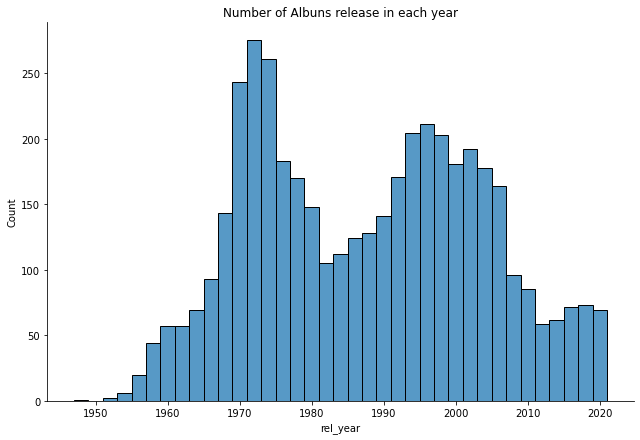

In [40]:
sns.displot(dfs.rel_year, height=6, aspect= 1.5, binwidth = 2)
plt.title("Number of Albuns release in each year");

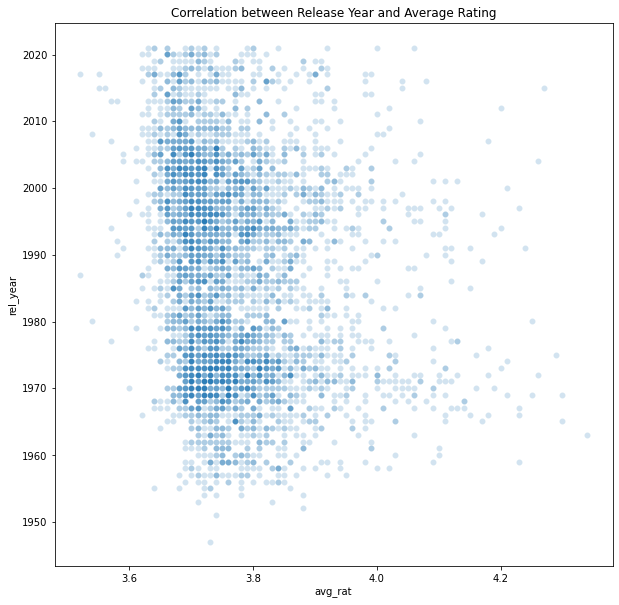

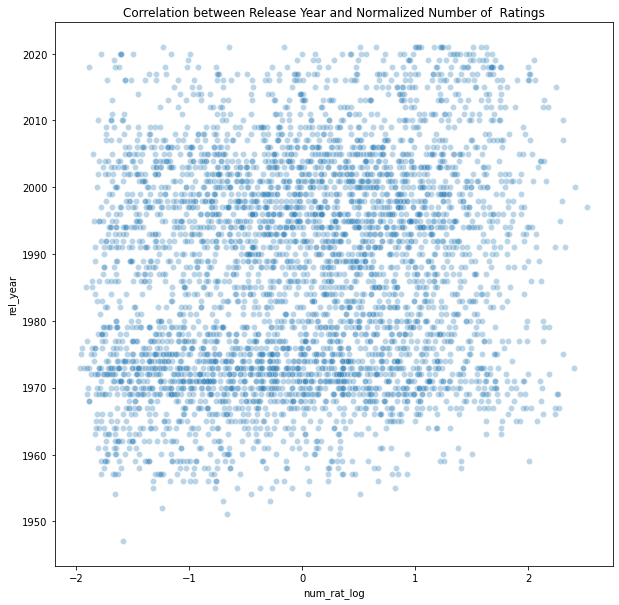

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = dfs.avg_rat, y = ((dfs.rel_year - 1940)/12), alpha = 0.2)
plt.title("Correlation between Release Year and Average Rating")
plt.yticks([0.83,1.66,2.5,3.33,4.166,5,5.833,6.66], 
    [1950,1960,1970,1980,1990,2000,2010,2020]);

plt.figure(figsize=(10,10))
sns.scatterplot(x = dfs.num_rat_log, y = ((dfs.rel_year - 1940)/12), alpha = 0.3)
plt.title("Correlation between Release Year and Normalized Number of  Ratings")
plt.yticks([0.83,1.66,2.5,3.33,4.166,5,5.833,6.66], 
    [1950,1960,1970,1980,1990,2000,2010,2020]);

- ordered categorical by decades
- compare "pinacle" decades to rest

#### By decades

In [42]:
bins = range(1950, 2040, 10)
binslabels = [str(i) for i in range(1950, 2030, 10)]
dfs["decade"] = pd.cut(dfs.rel_year, bins, labels=binslabels)

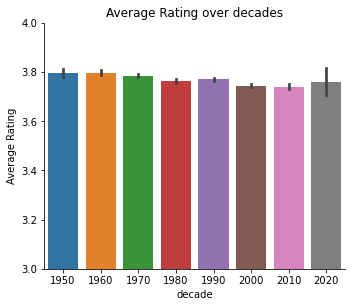

In [43]:
sns.catplot(data = dfs, x = "decade", y = "avg_rat", kind="bar", height=4, aspect= 1.2)
plt.ylim((3, 4))
plt.ylabel("Average Rating")
plt.title("Average Rating over decades");

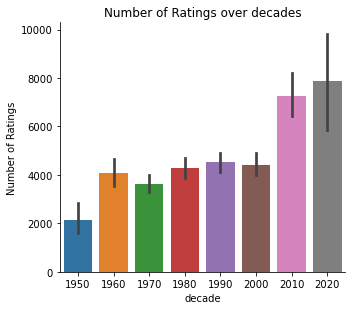

In [44]:
sns.catplot(data = dfs, x = "decade", y = "num_rat", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings over decades");

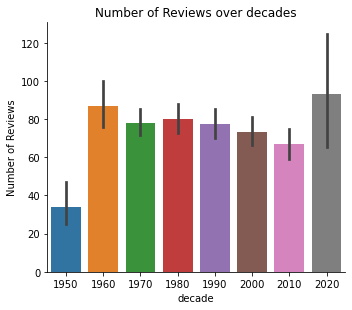

In [45]:
sns.catplot(data = dfs, x = "decade", y = "num_revs", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews over decades");

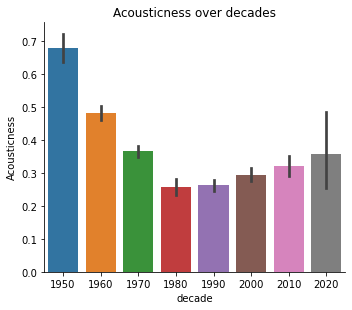

In [46]:
sns.catplot(data = dfs, x = "decade", y = "acousticness", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Acousticness")
plt.title("Acousticness over decades");

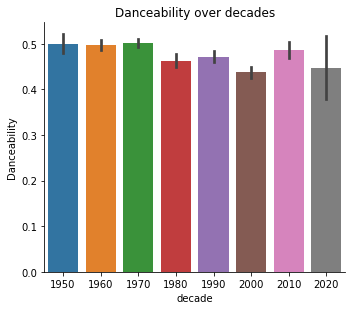

In [47]:
sns.catplot(data = dfs, x = "decade", y = "danceability", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Danceability")
plt.title("Danceability over decades");

# how suitable to dance

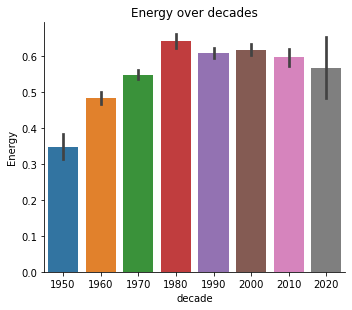

In [48]:
sns.catplot(data = dfs, x = "decade", y = "energy", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Energy")
plt.title("Energy over decades");

# energy like death metal X bach

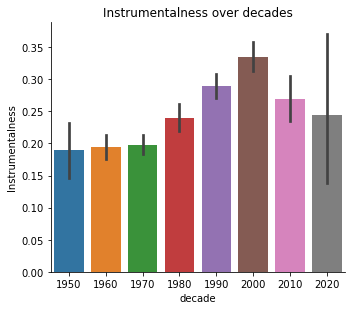

In [49]:
sns.catplot(data = dfs, x = "decade", y = "instrumentalness", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Instrumentalness")
plt.title("Instrumentalness over decades");

# high score means low amount of speech/singing

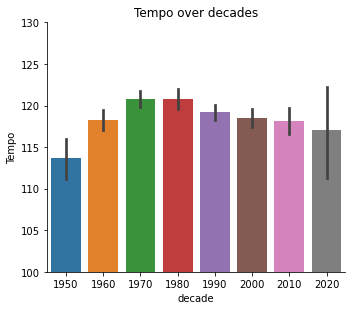

In [50]:
sns.catplot(data = dfs, x = "decade", y = "tempo", kind="bar", height=4, aspect= 1.2)
plt.ylim((100, 130))
plt.ylabel("Tempo")
plt.title("Tempo over decades");

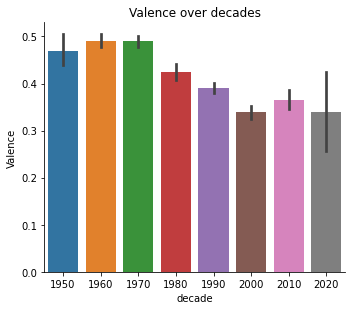

In [51]:
sns.catplot(data = dfs, x = "decade", y = "valence", kind="bar", height=4, aspect= 1.2)
# plt.ylim((3, 4))
plt.ylabel("Valence")
plt.title("Valence over decades");

# related to positive feelings conveyed by the track

#### Study on differences over the *1969-1975* and *1994-1998* periods

In [52]:
print("avg rating over all dataset = " + str(dfs.avg_rat.mean()))
print("avg rating over 1969-1975 period = " + str(dfs.avg_rat[(dfs.rel_year > 1968)&(dfs.rel_year < 1976)].mean()))
print("avg rating over 1994-1998 period = " + str(dfs.avg_rat[(dfs.rel_year > 1993)&(dfs.rel_year < 1999)].mean()))


avg rating over all dataset = 3.7713198546115225
avg rating over 1969-1975 period = 3.79168742921854
avg rating over 1994-1998 period = 3.771547169811337


In [53]:
# std dev of avg_rat
dfs.avg_rat.std()

0.1006055643738593

In [54]:
print("avg num rat over all dataset = " + str(dfs.num_rat.mean()))
print("avg num rat over 1969-1975 period = " + str(dfs.num_rat[(dfs.rel_year > 1968)&(dfs.rel_year < 1976)].mean()))
print("avg num rat over 1994-1998 period = " + str(dfs.num_rat[(dfs.rel_year > 1993)&(dfs.rel_year < 1999)].mean()))


avg num rat over all dataset = 4346.915720127215
avg num rat over 1969-1975 period = 3647.533408833522
avg num rat over 1994-1998 period = 4521.75283018868


In [55]:
# std dev num_rat
dfs.num_rat.std()

6228.544443269565

In [56]:
print("avg num rat log over all dataset = " + str(dfs.num_rat_log.mean()))
print("avg num rat log over 1969-1975 period = " + str(dfs.num_rat_log[(dfs.rel_year > 1968)&(dfs.rel_year < 1976)].mean()))
print("avg num rat log over 1994-1998 period = " + str(dfs.num_rat_log[(dfs.rel_year > 1993)&(dfs.rel_year < 1999)].mean()))


avg num rat log over all dataset = 8.308261444162178e-16
avg num rat log over 1969-1975 period = -0.18506190027100713
avg num rat log over 1994-1998 period = 0.08060895549079558


In [57]:
# std dev num_rat
dfs.num_rat_log.std()

1.000113604090115

In [58]:
print("avg num revs over all dataset = " + str(dfs.num_revs.mean()))
print("avg num revs over 1969-1975 period = " + str(dfs.num_revs[(dfs.rel_year > 1968)&(dfs.rel_year < 1976)].mean()))
print("avg num revs over 1994-1998 period = " + str(dfs.num_revs[(dfs.rel_year > 1993)&(dfs.rel_year < 1999)].mean()))


avg num revs over all dataset = 76.53884597910042
avg num revs over 1969-1975 period = 79.8946772366931
avg num revs over 1994-1998 period = 76.41698113207548


In [59]:
# std dev num_rat
dfs.num_revs.std()

112.97784765092594

In [60]:
print("avg num revs log over all dataset = " + str(dfs.num_revs_log.mean()))
print("avg num revs log over 1969-1975 period = " + str(dfs.num_revs_log[(dfs.rel_year > 1968)&(dfs.rel_year < 1976)].mean()))
print("avg num revs log over 1994-1998 period = " + str(dfs.num_revs_log[(dfs.rel_year > 1993)&(dfs.rel_year < 1999)].mean()))


avg num revs log over all dataset = -5.449979404617221e-16
avg num revs log over 1969-1975 period = 0.019934314587405865
avg num revs log over 1994-1998 period = 0.023948071907483694


In [61]:
# std dev num_rat
dfs.num_revs_log.std()

1.0001136040901135

#### Conclusions

### `'gens'`

In [62]:
genres = dfs.gens.str.get_dummies(", ")
# genres[genres == 0] = np.nan # os nulos vão p/ NaN
genres = genres.apply(pd.to_numeric, downcast = "integer") # passa p/ int
# genres.info()

In [63]:
# amount of genres used to describe eacah album
genres.sum(axis = 1).value_counts()

2    2016
1    1652
3     666
4      64
5       4
dtype: int64

*over 95% of data has 3 or less individual genres descriptions*

In [64]:
# creates genre_rank to rank each genre descriptor in number of occurrences
genres_rank = genres.sum(axis = 0).sort_values(ascending = False)
genres_rank.index = genres_rank.index.str.replace("-", " ").str.replace("/", " ")
genres_rank = genres_rank.reset_index()
genres_rank.rename(columns={"index": "genre", 0: "instances"}, inplace=True)

In [65]:
# most popular subgenres and number of occurrences
gr = genres_rank.sort_values("instances", ascending = False)
gr.head(25)

genre  instances
0    Singer Songwriter        338
1     Progressive Rock        281
2            Hard Rock        159
3     Alternative Rock        153
4             Pop Rock        142
5          Heavy Metal        140
6   East Coast Hip Hop        115
7            Post Punk        114
8             Art Rock        113
9           Film Score        112
10            Hard Bop        111
11          Indie Rock        107
12          Blues Rock        105
13   Progressive Metal        104
14           Folk Rock        104
15             Art Pop        103
16    Psychedelic Rock        103
17            Post Bop         94
18   Experimental Rock         84
19   Contemporary Folk         82
20        Thrash Metal         81
21            Boom Bap         81
22    Avant Garde Jazz         78
23         Death Metal         76
24            New Wave         72

In [66]:
# which genres are related to "Singer/Songwriter"
dfs_gen.main_gen[dfs_gen.gen1.str.contains("Singer/Songwriter")|dfs_gen.gen2.str.contains("Singer/Songwriter")|dfs_gen.gen3.str.contains("Singer/Songwriter")].value_counts()

Rock        131
Folk         87
OtherGen     36
Pop          35
Country      33
Blues         6
Soul          3
Punk          3
Jazz          2
Name: main_gen, dtype: int64

In [67]:
# what subgenres were classified under "OtherGen"
gen123[gen123.main_gen == "OtherGen"].value_counts().head(30)

gen1                    gen2               gen3  main_gen
Roots Reggae                                     OtherGen    22
Afrobeat                                         OtherGen    14
MPB                     Singer/Songwriter        OtherGen    12
Singer/Songwriter                                OtherGen    11
Neo-Prog                                         OtherGen    10
Bossa nova                                       OtherGen     9
Slowcore                                         OtherGen     8
Ambient                                          OtherGen     8
MPB                                              OtherGen     8
Big Band                                         OtherGen     8
Metalcore                                        OtherGen     7
Minimalism                                       OtherGen     6
American Primitivism                             OtherGen     6
Mathcore                                         OtherGen     6
Zeuhl                                         

In [68]:
# most used keywords for genres

genres_all = []
for i in genres_rank.genre:
    genres_all += i.split(" ")

pd.Series(genres_all).value_counts(ascending=False).head(20)

Rock           51
Metal          41
Music          36
Pop            34
Folk           30
Jazz           25
Punk           20
Blues          17
Soul           15
Hop            15
Hip            13
Country        12
New             9
Funk            9
Post            8
Classical       8
Progressive     8
Ambient         8
Rap             8
Black           7
dtype: int64

In [69]:
# creates genre_rat, to aggregate avg_rat/num_rat for each genre
genre_rat = dfs_gen[["album", "avg_rat", "num_rat_log", "rel_year", "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country", "Classical", "OtherGen"]].melt(id_vars=("album", "avg_rat", "num_rat_log", "rel_year"))
genre_rat = genre_rat[genre_rat.value != 0]

In [70]:
genre_rat.head()

album  avg_rat  num_rat_log  rel_year variable  \
0                       OK Computer     4.23     2.522328      1997     Rock   
1                Wish You Were Here     4.29     2.307201      1975     Rock   
2  In the Court of the Crimson King     4.30     2.259643      1969     Rock   
3                             Kid A     4.21     2.416579      2000     Rock   
6         The Dark Side of the Moon     4.20     2.406860      1973     Rock   

   value  
0      1  
1      1  
2      1  
3      1  
6      1

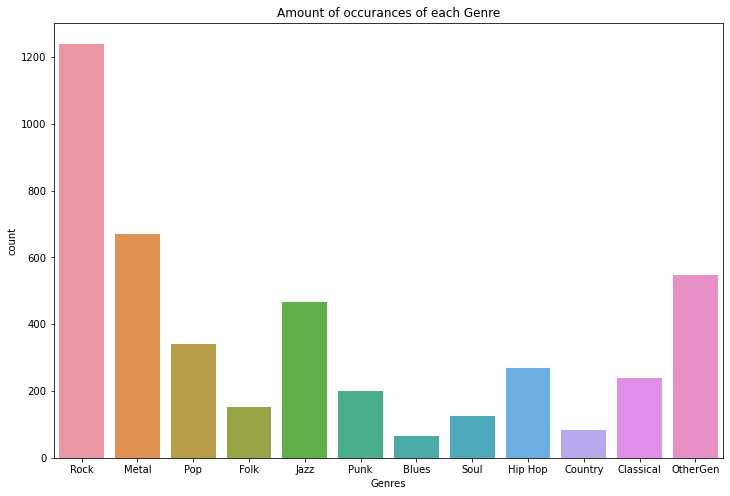

In [71]:
plt.figure(figsize=(12,8))
sns.countplot(data= dfs_gen, x="main_gen", order=main_genres)
plt.title("Amount of occurances of each Genre")
plt.xlabel("Genres");

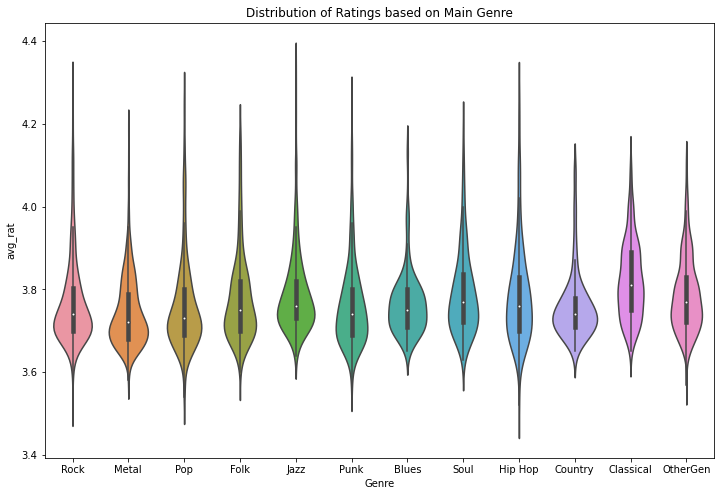

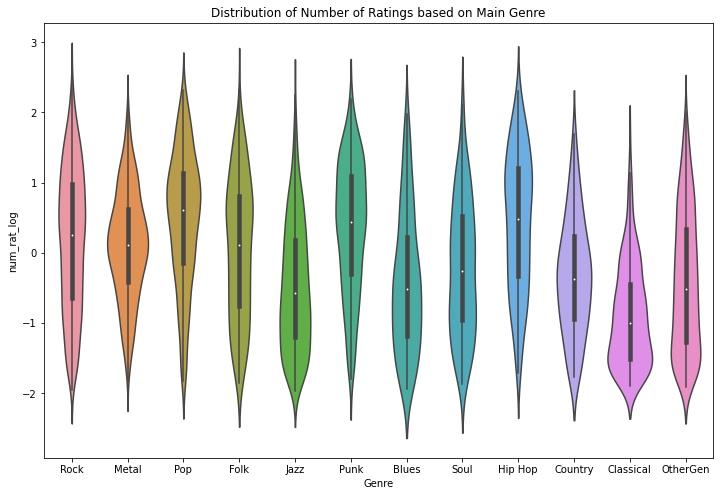

In [72]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_rat, x = "variable", y = "avg_rat")
plt.title("Distribution of Ratings based on Main Genre")
plt.xlabel("Genre");

plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_rat, x = "variable", y = "num_rat_log")
plt.title("Distribution of Number of Ratings based on Main Genre")
plt.xlabel("Genre");

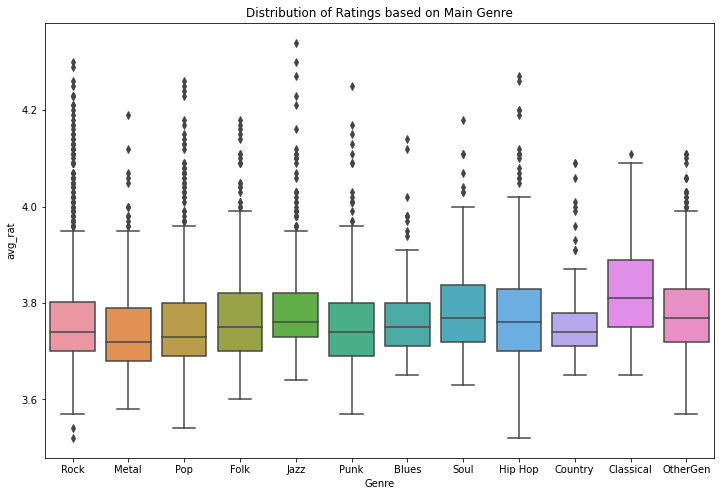

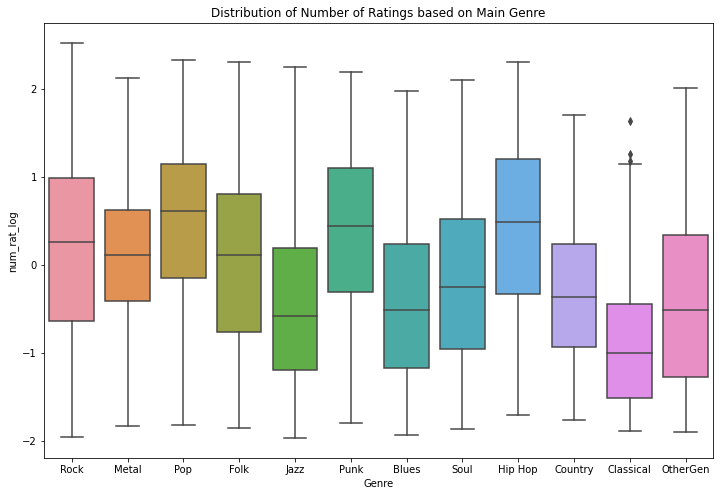

In [73]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_rat, x = "variable", y = "avg_rat")
plt.title("Distribution of Ratings based on Main Genre")
plt.xlabel("Genre");

plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_rat, x = "variable", y = "num_rat_log")
plt.title("Distribution of Number of Ratings based on Main Genre")
plt.xlabel("Genre");

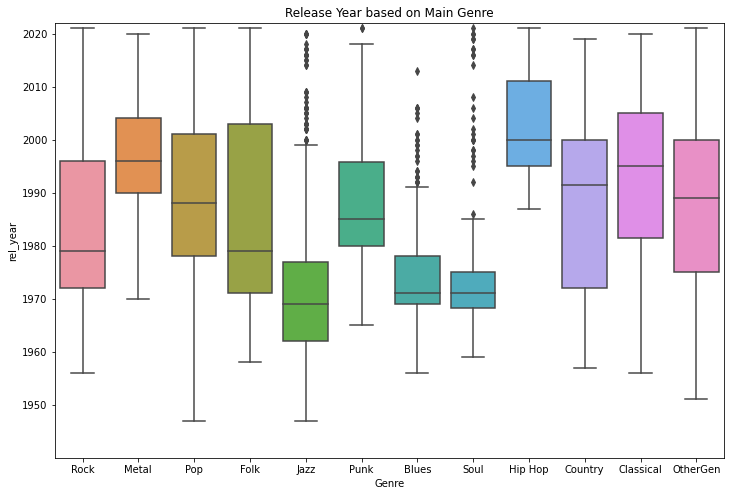

In [74]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_rat, x = "variable", y = "rel_year")
plt.title("Release Year based on Main Genre")
plt.yticks([1950,1960,1970,1980,1990,2000,2010,2020])
plt.ylim((1940,2022))
plt.xlabel("Genre");

- percentage of each main genre
- genre score by year

#### Conclusions

### `'avg_rat'`

In [75]:
temp = "avg_rat"

In [76]:
dfs[temp].describe()

count    4402.000000
mean        3.771320
std         0.100606
min         3.520000
25%         3.700000
50%         3.750000
75%         3.810000
max         4.340000
Name: avg_rat, dtype: float64

In [77]:
dfs[temp].quantile(0.96)

3.99

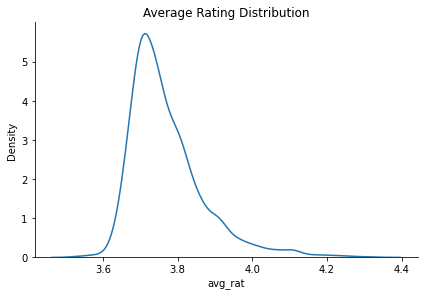

In [78]:
# plt.figure(figsize=(12,8))
sns.displot(dfs[temp],  height=4, aspect= 1.5, kind = "kde")
plt.title("Average Rating Distribution");
#plt.xlim((0, 5))
#plt.ylim((0, 600))

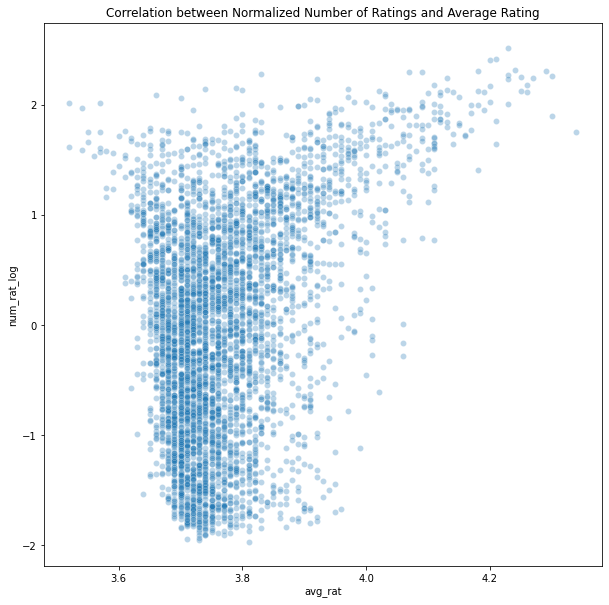

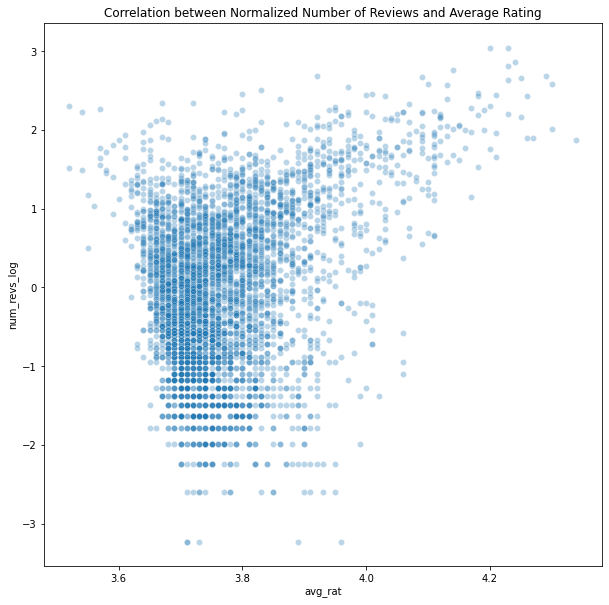

In [79]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = "num_rat_log", alpha= 0.3)
plt.title("Correlation between Normalized Number of Ratings and Average Rating");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = "num_revs_log", alpha= 0.3)
plt.title("Correlation between Normalized Number of Reviews and Average Rating");

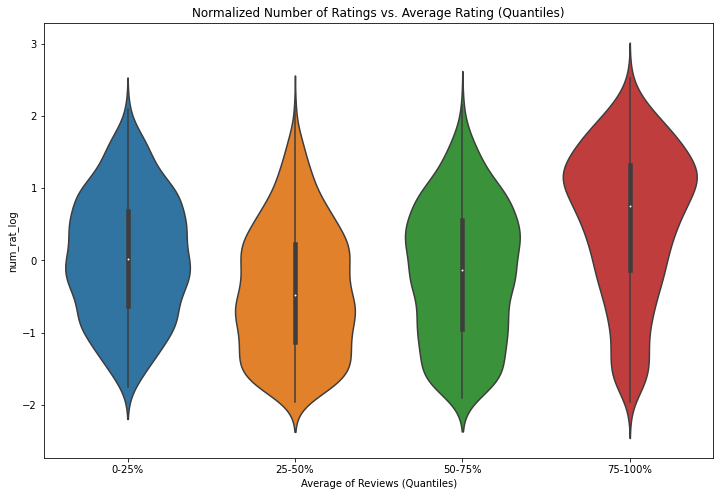

In [80]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = "num_rat_log", order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Normalized Number of Ratings vs. Average Rating (Quantiles)")
plt.xlabel("Average of Reviews (Quantiles)");


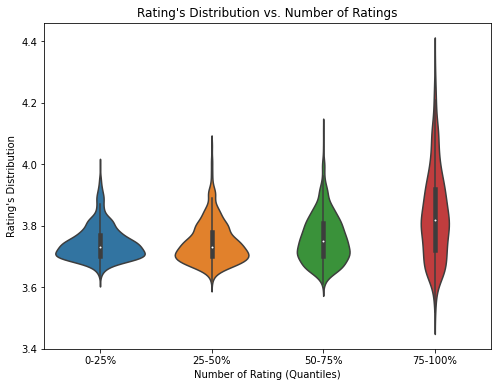

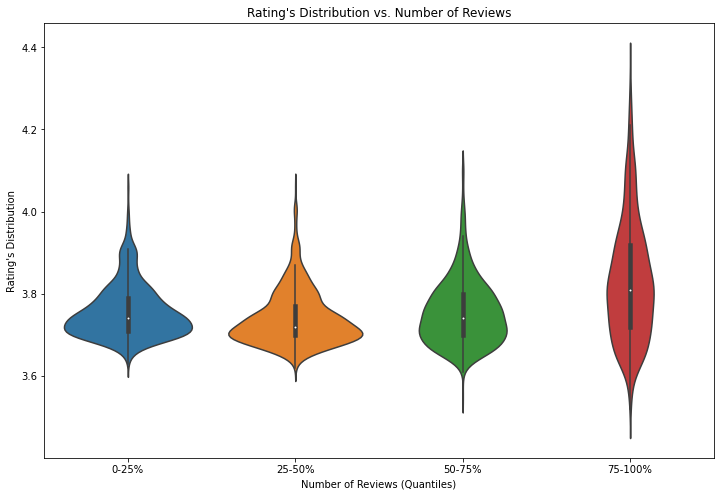

In [81]:
plt.figure(figsize = (8,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = "avg_rat", order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Rating's Distribution vs. Number of Ratings")
plt.xlabel("Number of Rating (Quantiles)")
plt.ylabel("Rating's Distribution");

plt.figure(figsize = (12,8))
sns.violinplot(data = dfs, x = "num_rev_qt", y = "avg_rat", order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Rating's Distribution vs. Number of Reviews")
plt.xlabel("Number of Reviews (Quantiles)")
plt.ylabel("Rating's Distribution");

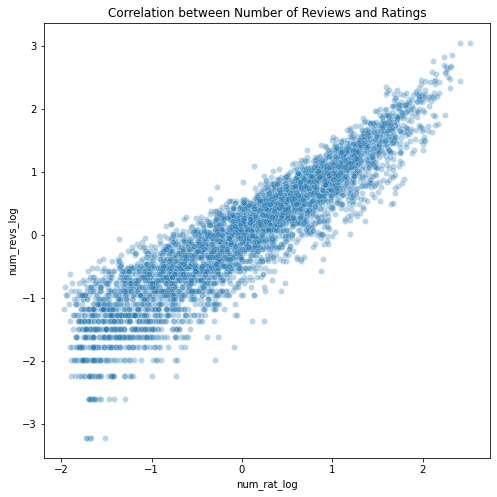

In [82]:
plt.figure(figsize = (8,8))
sns.scatterplot(data = dfs, x = "num_rat_log", y = "num_revs_log", alpha= 0.3)
plt.title("Correlation between Number of Reviews and Ratings");

existe uma correlação linear entre `num_rat_log` e `num_revs_log`, que se torna menos linear com a redução na quantidade

#### Conclusions

- quando `num_rat_log` é > 1, percebemos que a `avg_rat` começa a crescer igualmente
- enquanto `num_rat_log` é < 1, `avg_rat` fica entre **3,65** e **3,85**
- outro comportamento interessante é que os albuns pior avaliados também estão entre os mais populares

A conclusão que podemos chegar é que com o aumento na quantidade de avaliações, a distribuição das notas fica mais "achatada", e temos valores mínimos e máximos mais extremos

- a correlação entre `avg_rat` e `num_revs_log` é similar à anterior ( X `num_rat_log` ), no entanto sofre c/ o agrupamento p/ instâncias com poucos reviews (< 10)

### `'num_rat'` and `'num_revs'`


In [83]:
temp = dfs.num_rat

In [84]:
temp.describe()

count     4402.000000
mean      4346.915720
std       6228.544443
min        260.000000
25%        818.250000
50%       2002.500000
75%       5156.500000
max      70382.000000
Name: num_rat, dtype: float64

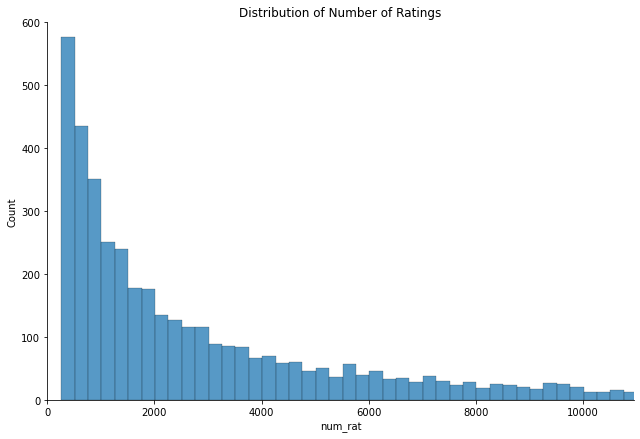

In [85]:
# plt.figure(figsize=(12,8))
sns.displot(temp, binwidth = 250, height=6, aspect= 1.5)
plt.xlim((0, temp.quantile(0.90)))
plt.ylim((0, 600))
plt.title("Distribution of Number of Ratings");

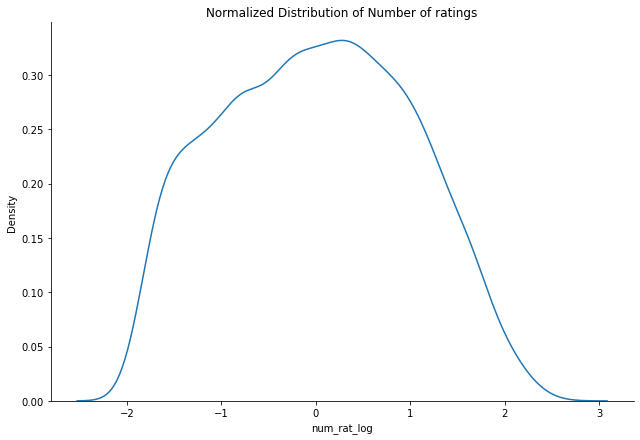

In [86]:
temp = dfs.num_rat_log
# plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde",height=6, aspect= 1.5)
plt.title("Normalized Distribution of Number of ratings");
# plt.xlim((0, 8000))
# plt.ylim((0, 600))

In [87]:
temp = dfs.num_revs

In [88]:
temp.describe()

count    4402.000000
mean       76.538846
std       112.977848
min         0.000000
25%        16.000000
50%        39.000000
75%        91.000000
max      1549.000000
Name: num_revs, dtype: float64

<Figure size 864x576 with 0 Axes>

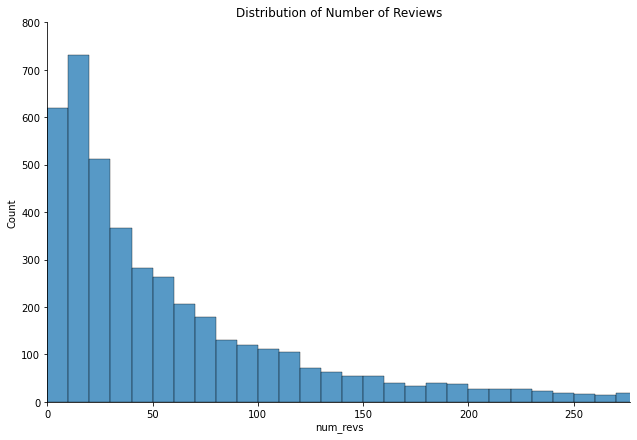

In [89]:
plt.figure(figsize=(12,8))
sns.displot(temp, binwidth = 10, height=6, aspect= 1.5);
plt.xlim((0, temp.quantile(0.95)));
plt.ylim((0, 800));
plt.title("Distribution of Number of Reviews");

<Figure size 864x576 with 0 Axes>

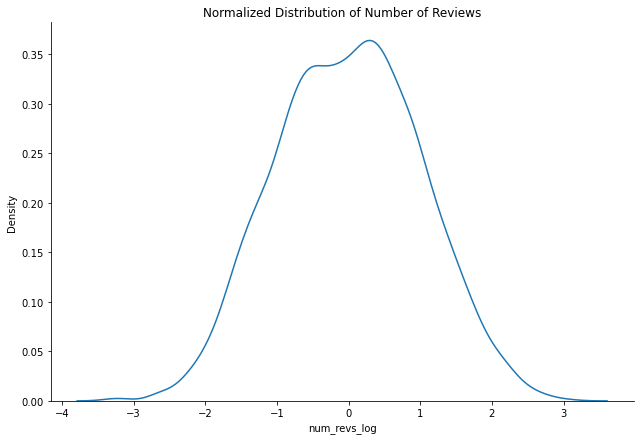

In [90]:
temp = dfs.num_revs_log
plt.figure(figsize=(12,8))
sns.displot(temp, kind = "kde", height=6, aspect= 1.5);
plt.title("Normalized Distribution of Number of Reviews");
# plt.xlim((0, 8000))
# plt.ylim((0, 600))

`num_revs_log` < -1 tem agrupamento
- fazer inverse transform p/ identificar o número real

In [91]:
log_transformer2.inverse_transform(np.reshape(
    dfs.num_revs_log[dfs.num_revs_log < -1].value_counts().index, (-1,1)))

array([[ 8.],
       [ 6.],
       [ 9.],
       [ 5.],
       [ 7.],
       [10.],
       [ 4.],
       [11.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 0.]])

#### Conclusion

### Music Descriptors

Creates `dfs_ml` a table with only the *genre* and *music descriptors*

In [92]:
# creates genre_rat, to aggregate avg_rat/num_rat for each genre
genre_desc = dfs_gen[['acousticness', 'danceability', 'energy','instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo','valence', 'duration_s', 
    'time_signature', 'rel_year',
    "Rock", "Metal", "Pop", "Folk", "Jazz", "Punk", 
    "Blues", "Soul", "Hip Hop", "Country", "Classical", "OtherGen"]].melt(id_vars=
    ('acousticness', 'danceability', 'energy','instrumentalness', 
    'liveness', 'loudness', 'speechiness', 'tempo','valence', 'duration_s', 
    'time_signature', 'rel_year'))
genre_desc = genre_desc[genre_desc.value != 0]

In [93]:
genre_desc.head()

acousticness  danceability    energy  instrumentalness  liveness  \
0      0.135763      0.288083  0.565917          0.161053  0.159375   
1      0.602800      0.373600  0.409800          0.363040  0.384940   
2      0.297686      0.340625  0.370475          0.327265  0.149138   
3      0.123219      0.601294  0.676706          0.000669  0.311412   
6      0.390310      0.383000  0.400450          0.595929  0.237680   

    loudness  speechiness       tempo   valence  duration_s  time_signature  \
0  -9.102417     0.056308  115.450750  0.291733  268.435500        4.000000   
1 -12.689400     0.039740  130.018800  0.259040  530.512000        3.600000   
2 -14.873125     0.043463  118.920625  0.279400  507.644125        3.875000   
3  -7.811941     0.268318  116.045059  0.398206  325.379529        4.058824   
6 -15.701900     0.058660  120.066200  0.272830  257.363600        3.700000   

   rel_year variable  value  
0      1997     Rock      1  
1      1975     Rock      1  
2      1969     Rock      1  
3      2000     Rock      1  
6      1973     Rock      1

#### `'acousticness'`

*A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.*


In [94]:
temp = "acousticness"

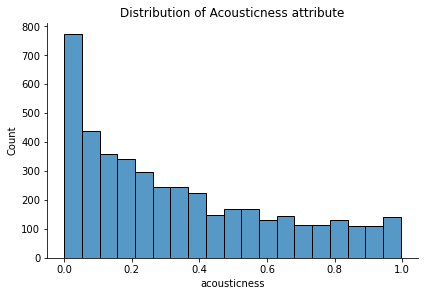

In [95]:
sns.displot(dfs[temp], kind = "hist", height=4, aspect= 1.5)
plt.title("Distribution of Acousticness attribute");


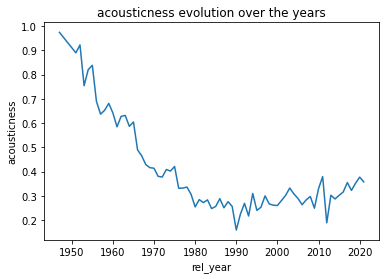

In [96]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

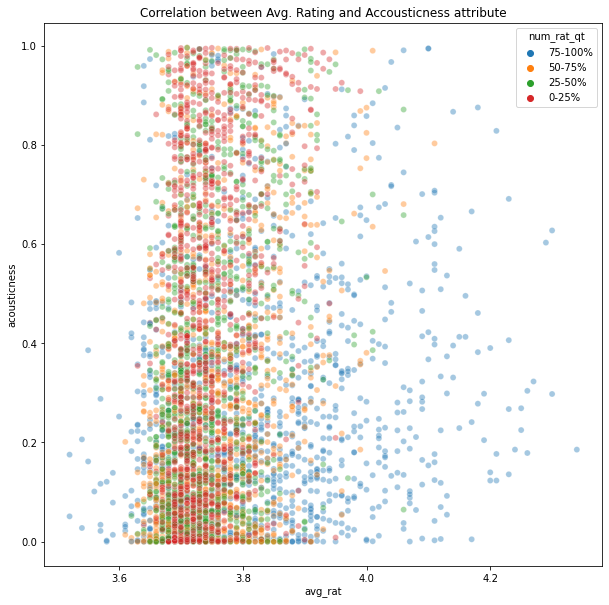

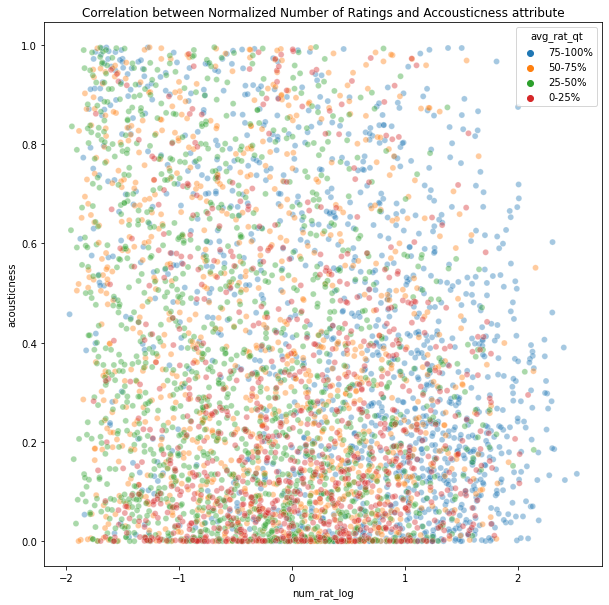

In [97]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp,hue = "num_rat_qt", alpha= 0.4)
plt.title("Correlation between Avg. Rating and Accousticness attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and Accousticness attribute");

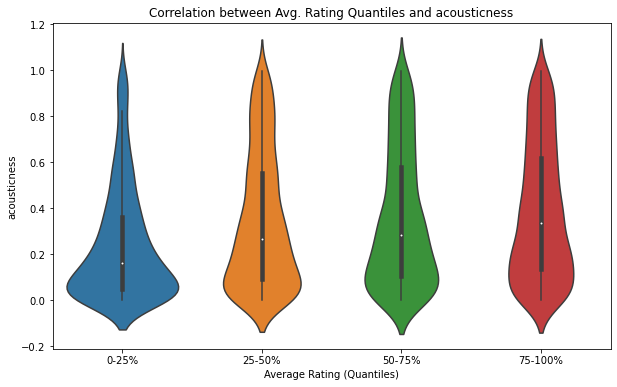

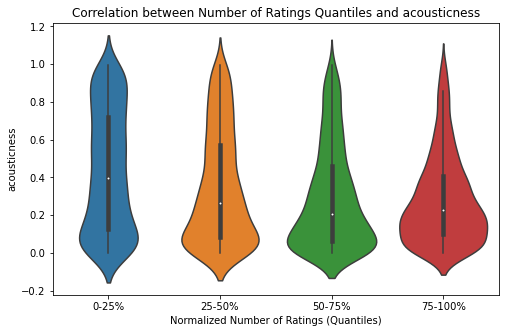

In [98]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

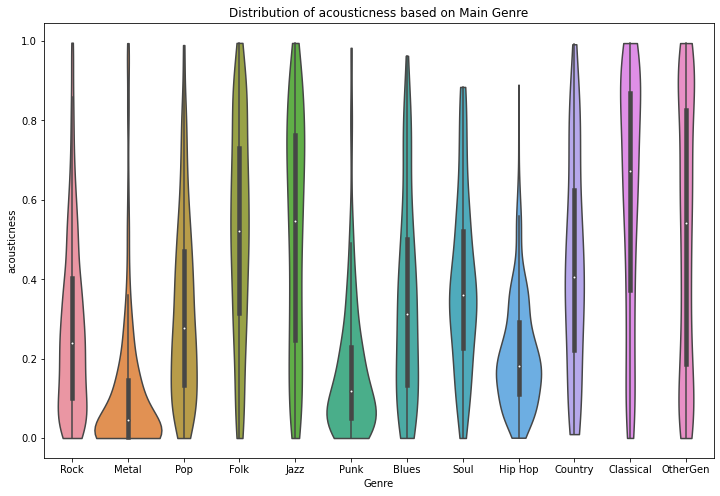

In [99]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp, cut = 0, width=1.2)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

TO-DO

- does accoustic albuns have a significant difference?

##### Conclusion

asd

#### `'danceability'`

*Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.*

In [100]:
temp = "danceability"

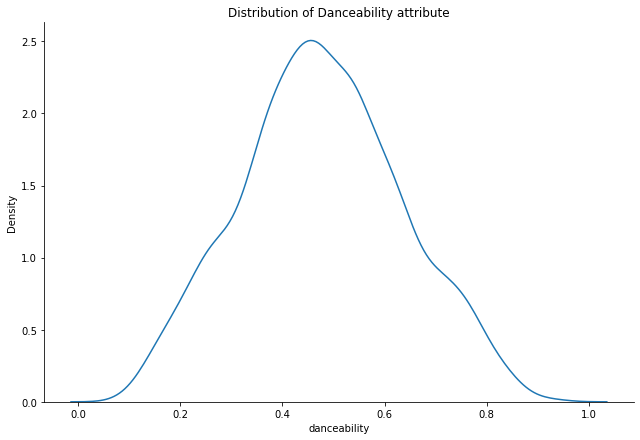

In [101]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Danceability attribute");


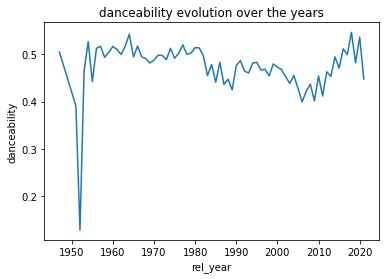

In [102]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

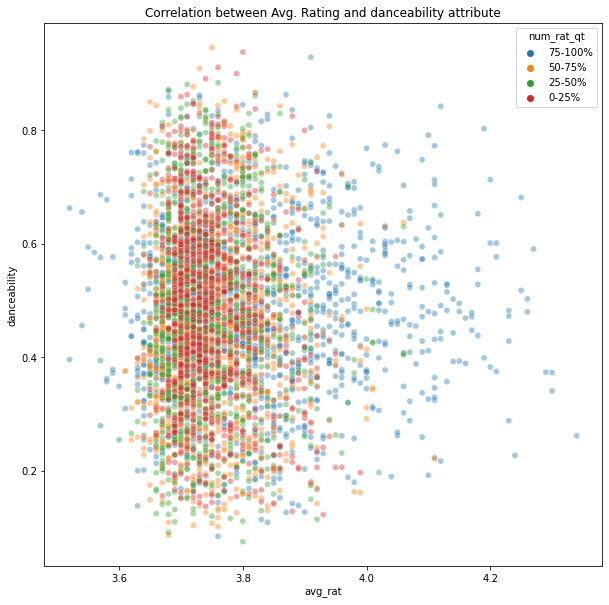

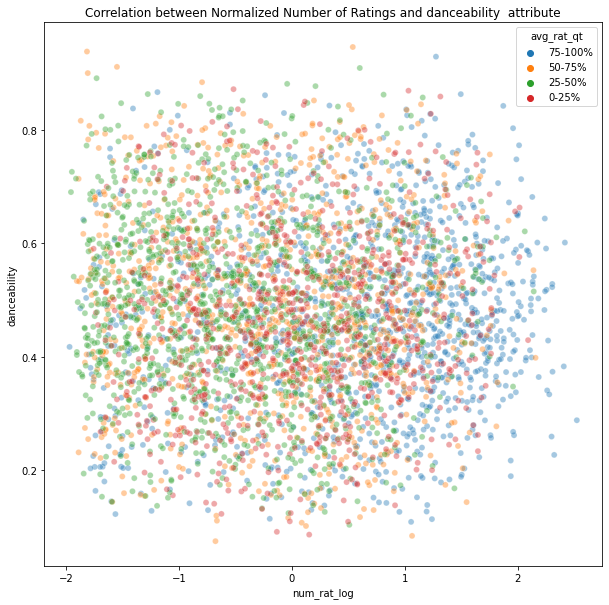

In [103]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

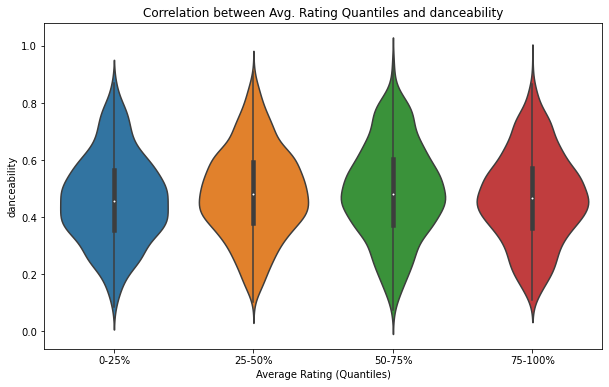

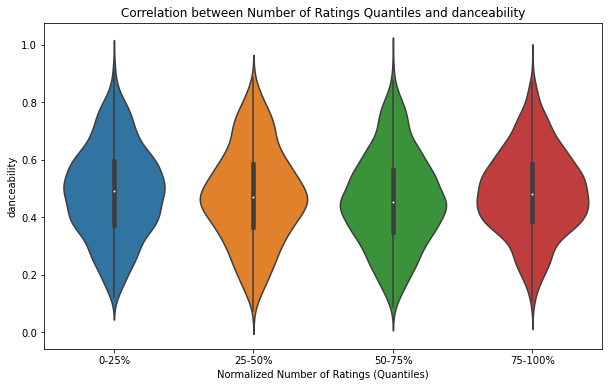

In [104]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp);
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp);
plt.xlabel("Normalized Number of Ratings (Quantiles)");

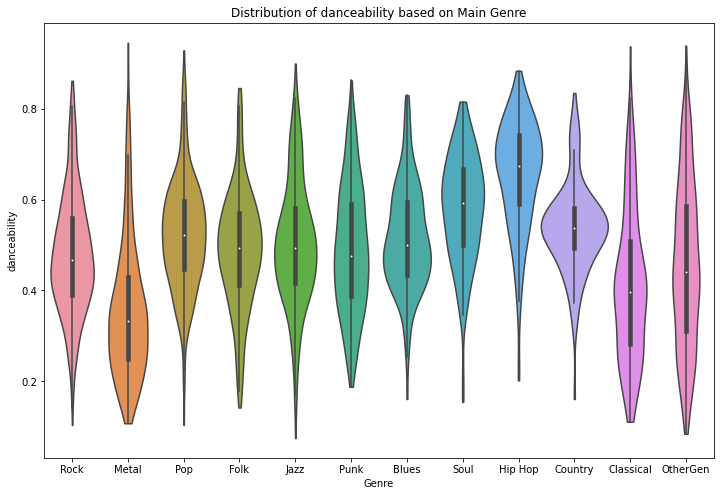

In [105]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp, cut = 0, width=1.2)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

- Seems to have very little influence in ratings or popularity

#### `'energy'`

*Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.*

In [238]:
temp = "energy"

In [245]:
dfs[temp].describe()

count    4402.000000
mean        0.575443
std         0.226569
min         0.002360
25%         0.422866
50%         0.598767
75%         0.746233
max         1.000000
Name: energy, dtype: float64

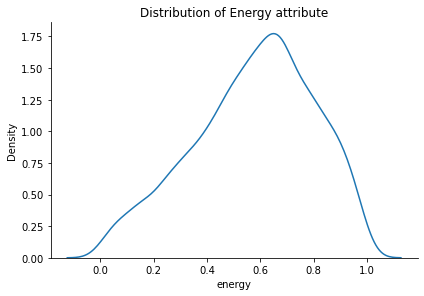

In [239]:
sns.displot(dfs[temp], kind = "kde", height=4, aspect= 1.5)
plt.title("Distribution of Energy attribute");

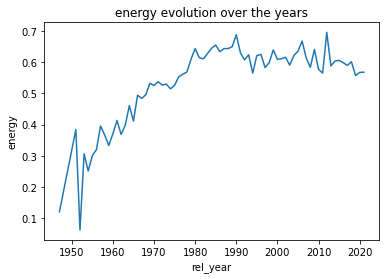

In [240]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

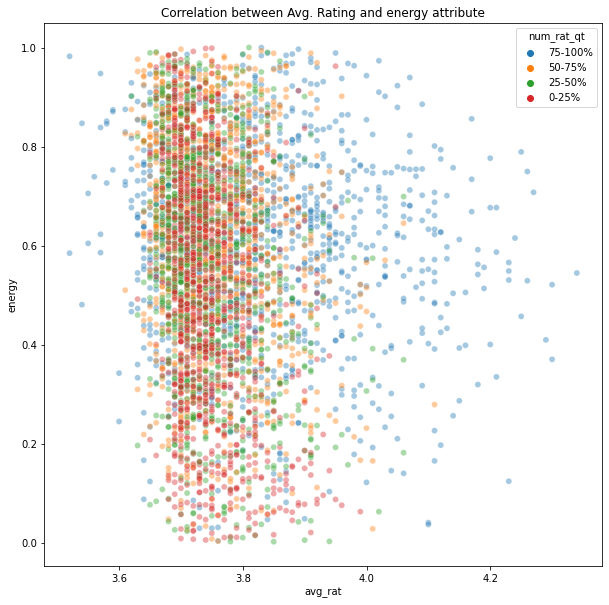

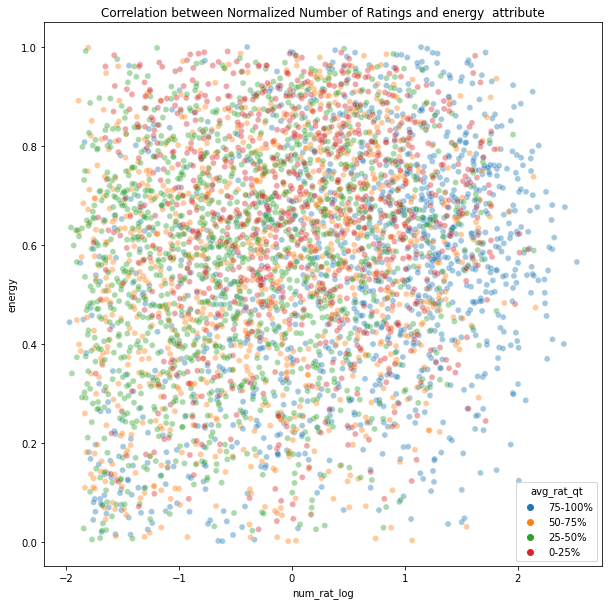

In [241]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

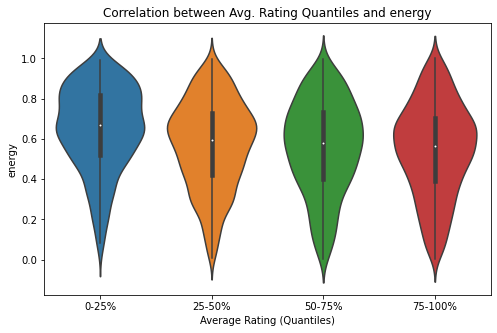

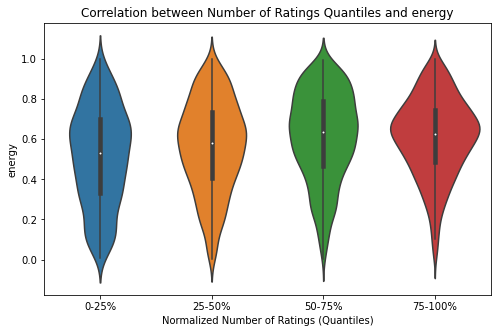

In [246]:
plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

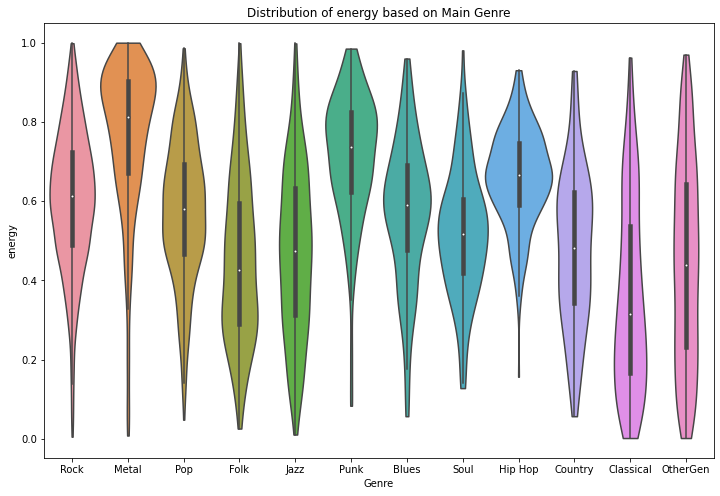

In [243]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp, cut = 0, width=1.2)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'instrumentalness'`

*Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.*

In [248]:
temp = "instrumentalness"

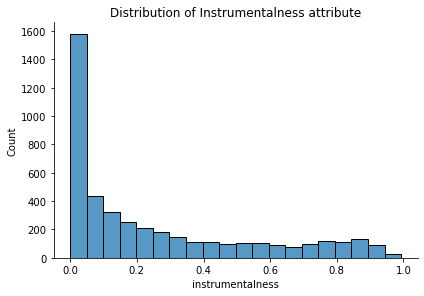

In [249]:
sns.displot(dfs[temp], kind = "hist", height=4, aspect= 1.5)
plt.title("Distribution of Instrumentalness attribute");

In [251]:
dfs.instrumentalness[dfs.instrumentalness < 0.1].count()/ 4400

0.4602272727272727

In [252]:
dfs.instrumentalness[dfs.instrumentalness < 0.5].count()/ 4400

0.7859090909090909

In [253]:
dfs.instrumentalness[dfs.instrumentalness > 0.8].count()/ 4400

0.07863636363636364

In [254]:
dfs[dfs.instrumentalness > 0.8].head(20)

ars_name   rel_date  \
88                                  Aphex Twin 1992-11-09   
96                               John Coltrane 1960-01-27   
108                              John Coltrane 1961-03-01   
135                  Steve Reich and Musicians 1978-04-01   
136                        山岡晃 [Akira Yamaoka] 2001-10-03   
152                           Boards of Canada 1998-04-20   
201                            Electric Wizard 2000-10-09   
209                                Miles Davis 1971-02-24   
276                           Artur Rubinstein 1967-01-01   
293                       植松伸夫 [Nobuo Uematsu] 1997-02-10   
297  John Williams / London Symphony Orchestra 1977-06-01   
304                              John Williams 1980-04-21   
313                                     R.E.M. 1983-04-12   
331                                  Cryptopsy 1996-07-03   
340                           Yasunori Mitsuda 1999-12-18   
366                                    Emperor 1994-02-21   
382                                Glenn Gould 1982-09-02   
390                                 Immolation 2000-11-07   
391                                       Isis 2004-10-19   
402                                 Aphex Twin 1994-03-07   

                                            gens  \
88                           Ambient Techno, IDM   
96                                      Hard Bop   
108                         Modal Jazz, Post-Bop   
135                                   Minimalism   
136                    Video Game Music, Ambient   
152                               IDM, Downtempo   
201                     Stoner Metal, Doom Metal   
209           Jazz Fusion, Jazz-Rock, Film Score   
276                                  Romanticism   
293        Video Game Music, Sequencer & Tracker   
297  Film Score, Cinematic Classical, Orchestral   
304  Film Score, Cinematic Classical, Orchestral   
313                 Jangle Pop, Alternative Rock   
331    Brutal Death Metal, Technical Death Metal   
340        Video Game Music, Sequencer & Tracker   
366           Symphonic Black Metal, Black Metal   
382                                Baroque Music   
390                                  Death Metal   
391         Atmospheric Sludge Metal, Post-Metal   
402                          Ambient, Electronic   

                                                 descs  avg_rat  num_rat  \
88   atmospheric, ethereal, futuristic, instrumenta...     4.03    27921   
96   instrumental, energetic, technical, improvisat...     4.10    13880   
108  instrumental, warm, improvisation, passionate,...     4.10    11660   
135  repetitive, hypnotic, rhythmic, minimalistic, ...     4.06     9251   
136  sombre, dark, melancholic, lonely, ominous, co...     4.09     5219   
152  atmospheric, mellow, hypnotic, mysterious, ins...     3.96    22253   
201  heavy, drugs, occult, psychedelic, nihilistic,...     3.97    13765   
209  energetic, improvisation, instrumental, psyche...     4.01     6329   
276  instrumental, melancholic, nocturnal, mellow, ...     4.01     2107   
293  bittersweet, suspenseful, epic, urban, sentime...     3.98     1861   
297  epic, space, instrumental, orchestral, melodic...     3.98     2194   
304  epic, ominous, space, instrumental, orchestral...     3.96     1755   
313  cryptic, melodic, atmospheric, male vocals, po...     3.90    14362   
331  aggressive, technical, heavy, death, manic, ma...     3.91     7080   
340  epic, tropical, peaceful, instrumental, eclect...     3.94      780   
366  cold, atmospheric, epic, nocturnal, fantasy, d...     3.90     8938   
382  instrumental, acoustic, technical, polyphonic,...     3.95     2385   
390  infernal, anti-religious, misanthropic, hatefu...     3.91     3884   
391  atmospheric, melancholic, dense, heavy, hypnot...     3.88     9697   
402  atmospheric, mysterious, ominous, minimalistic...     3.86    14140   

     num_revs                               album  acousticness  d

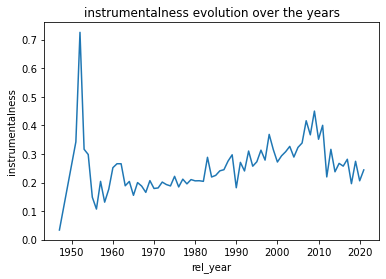

In [255]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

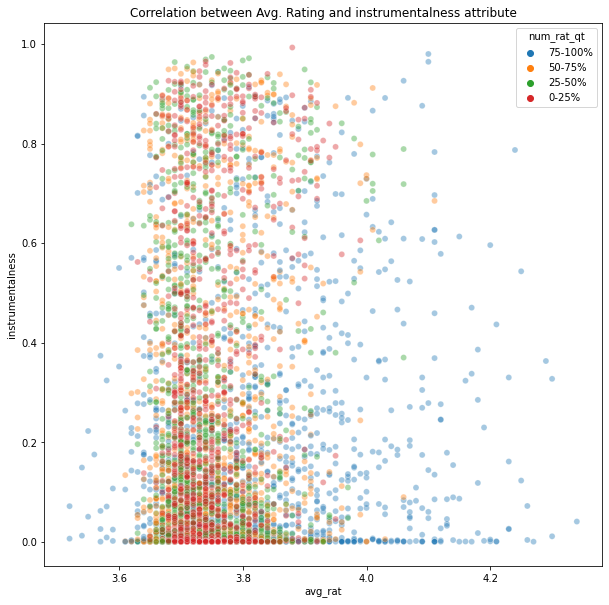

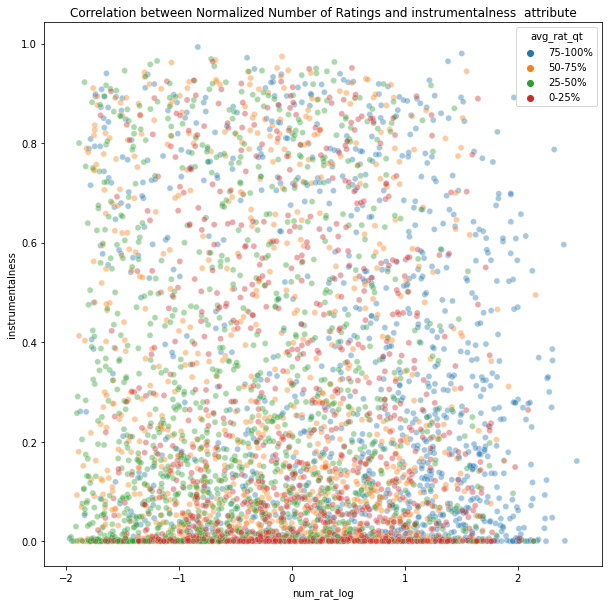

In [256]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

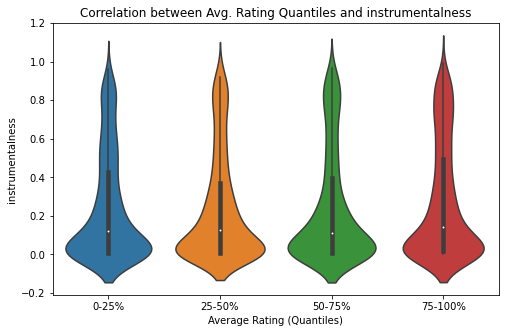

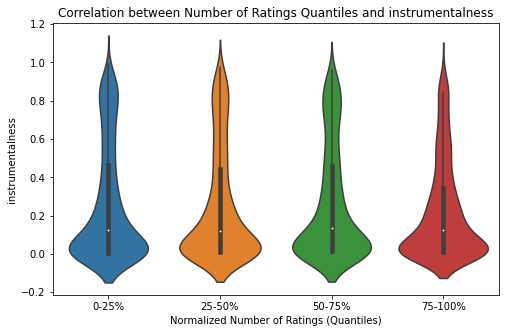

In [259]:
plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

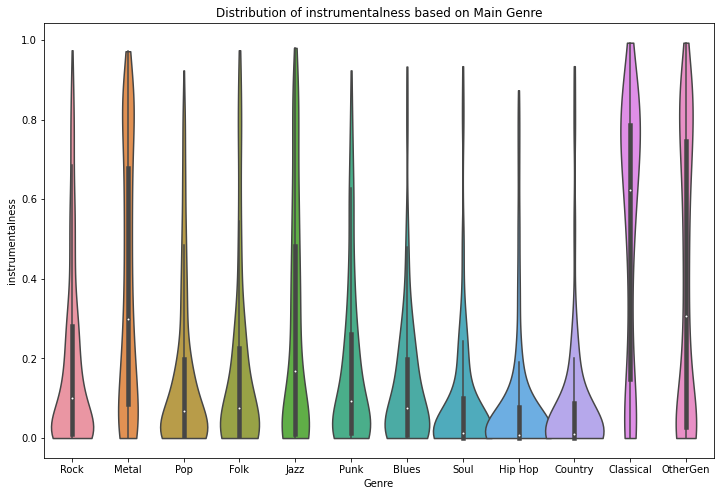

In [258]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp, cut = 0, width=1.2)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

***TO-DO*** Fazer uma comparação entre `intrumentalness` == 0 e != 0

##### Conclusion

asd

#### `'liveness'`

*Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.*

In [260]:
temp = "liveness"

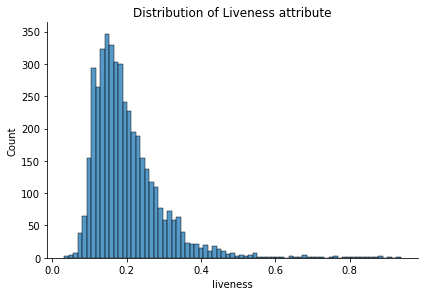

In [262]:
sns.displot(dfs[temp], kind = "hist", height=4, aspect= 1.5)
plt.title("Distribution of Liveness attribute");

In [264]:
dfs.liveness[dfs.liveness < 0.8].count()/ 4400

0.9972727272727273

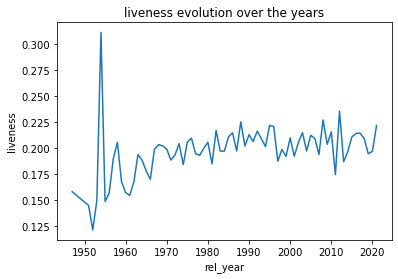

In [120]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

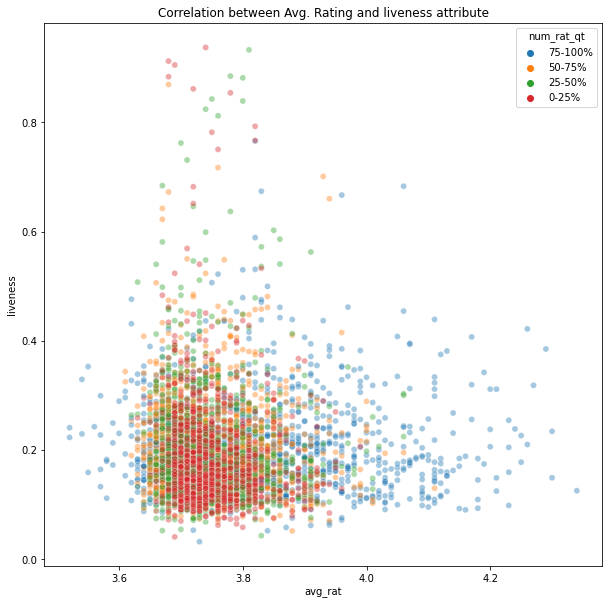

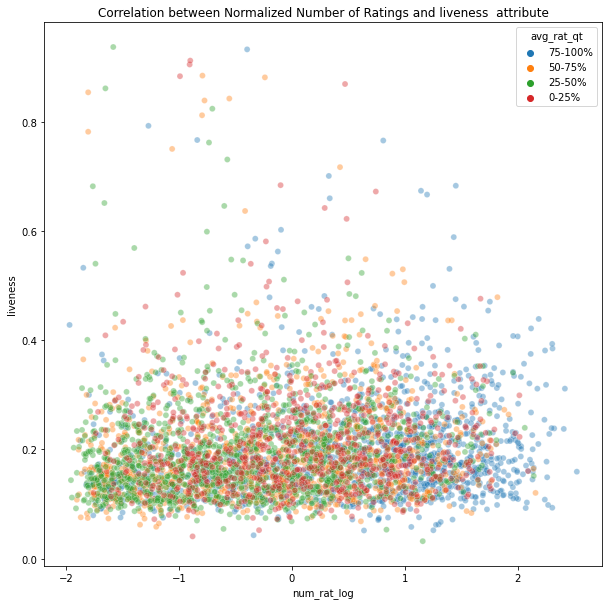

In [121]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

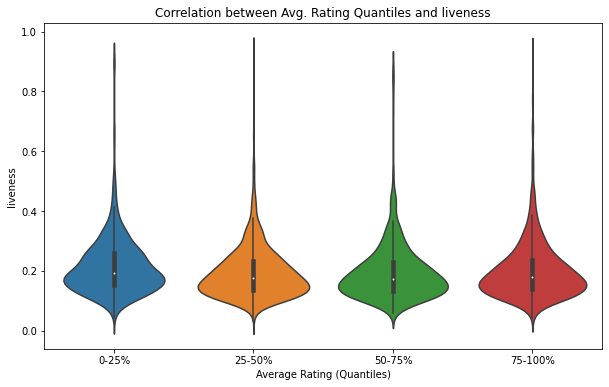

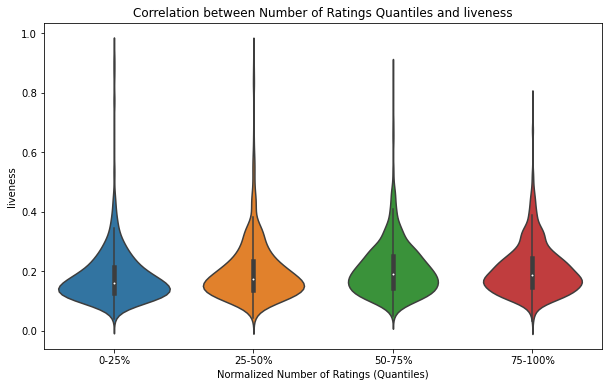

In [122]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp);
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

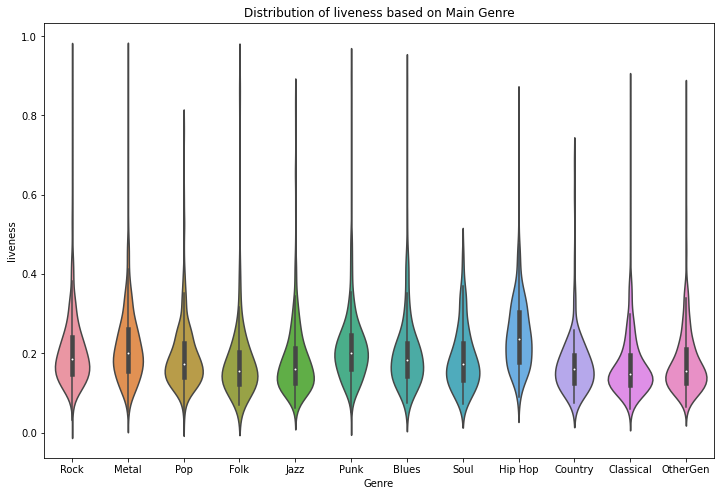

In [123]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

***TO-DO*** Fazer uma comparação entre `liveness` > 0.8 e != 0

##### Conclusion

asd

#### `'loudness'`

*The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.*

In [124]:
temp = "loudness"

Text(0.5, 1.0, 'Distribution of Loudness Attribute')

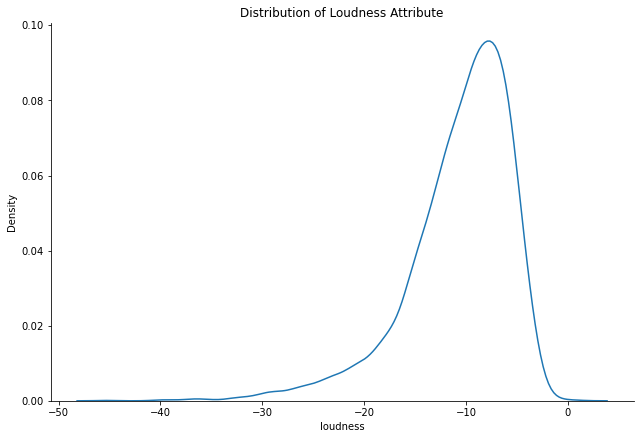

In [125]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Loudness Attribute");

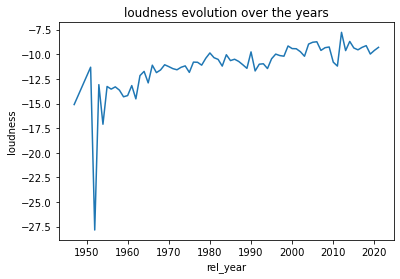

In [126]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

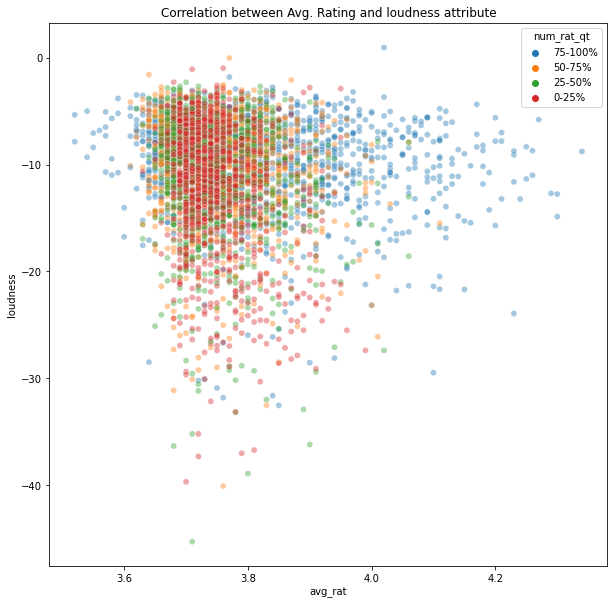

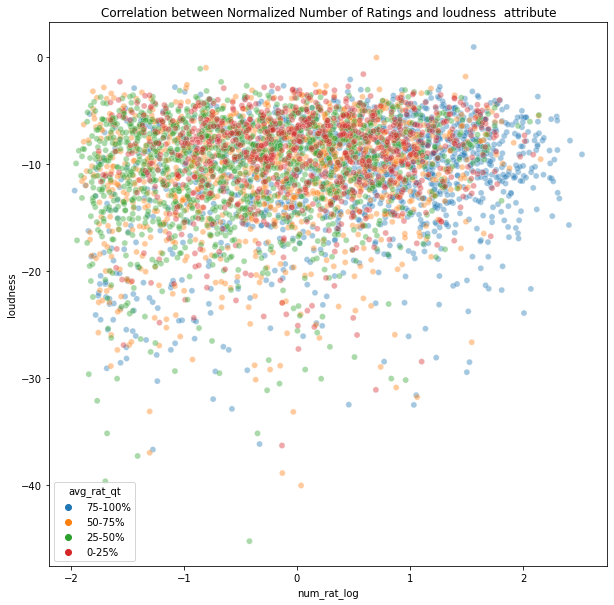

In [127]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

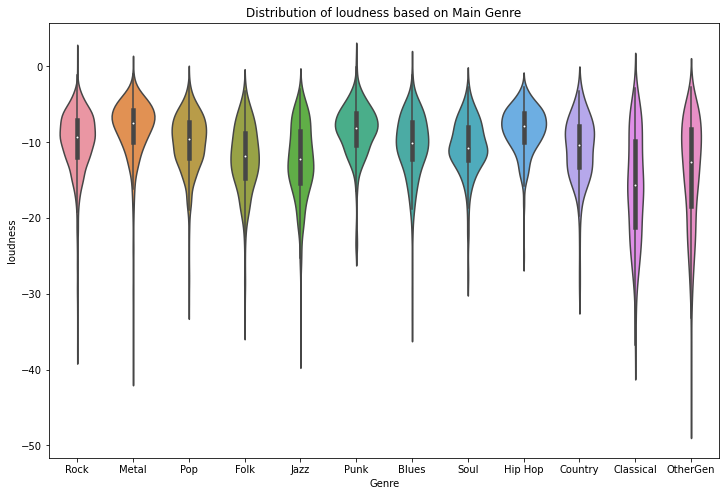

In [128]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

In [269]:
dfs.loudness.mean()

-10.674275392899437

In [272]:
genre_desc.loudness[genre_desc.variable == "Classical"].mean()

-15.795674967254085

##### Conclusion

asd

#### `'speechiness'`

*Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.*

In [273]:
temp = "speechiness"

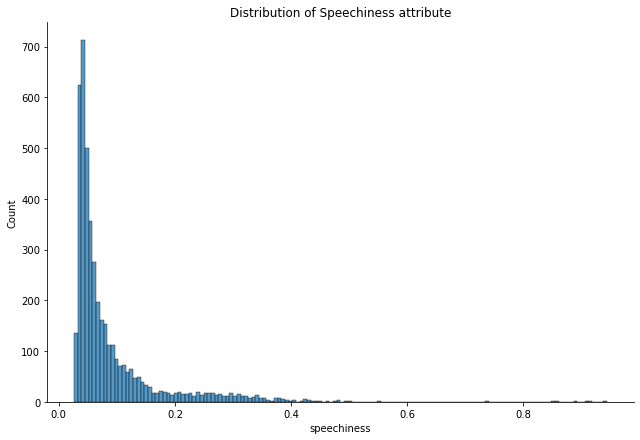

In [130]:
sns.displot(dfs[temp], kind = "hist", height=6, aspect= 1.5)
plt.title("Distribution of Speechiness attribute");

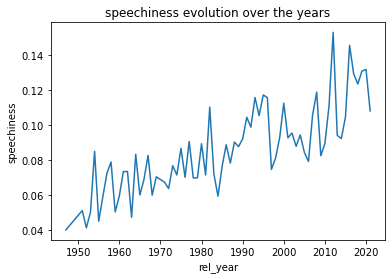

In [131]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

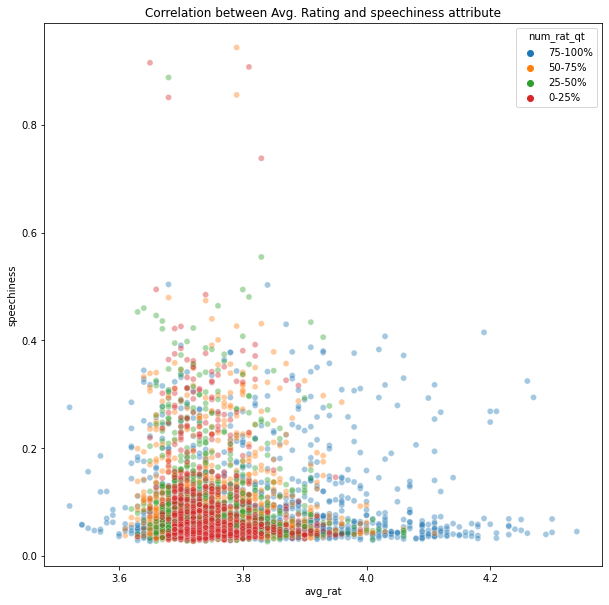

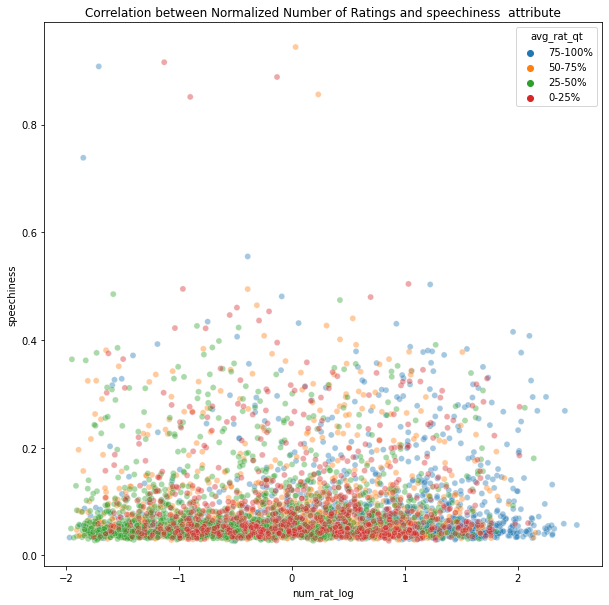

In [132]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

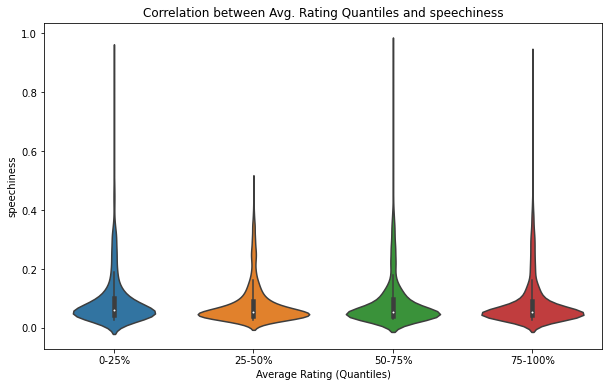

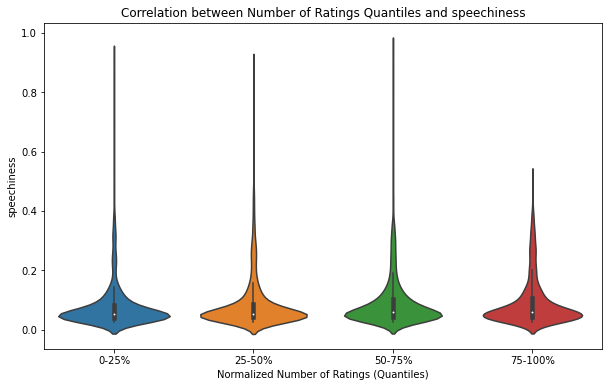

In [133]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

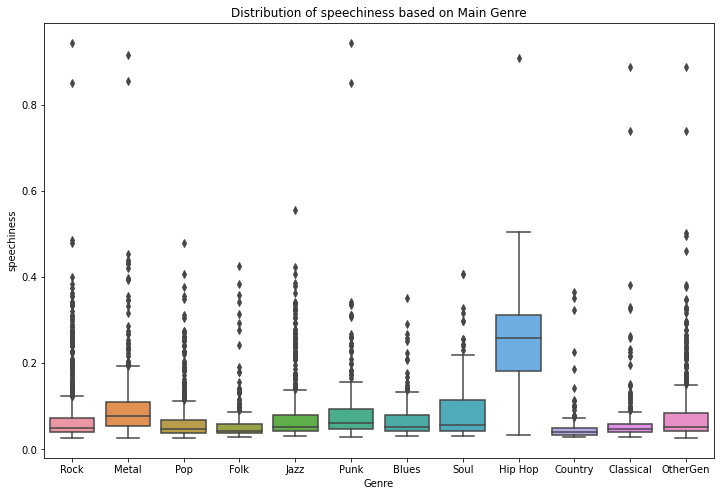

In [274]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'tempo'`

*The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.*

In [277]:
temp = "tempo"

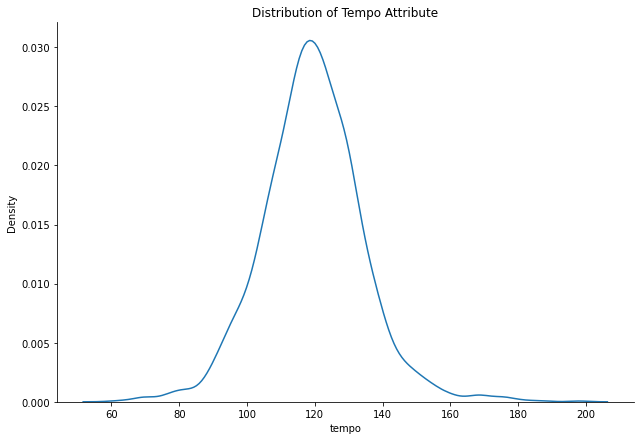

In [136]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Tempo Attribute");

In [275]:
dfs.tempo.describe()

count    4402.000000
mean      119.290332
std        14.933975
min        60.011000
25%       110.363377
50%       119.175856
75%       128.042923
max       197.931000
Name: tempo, dtype: float64

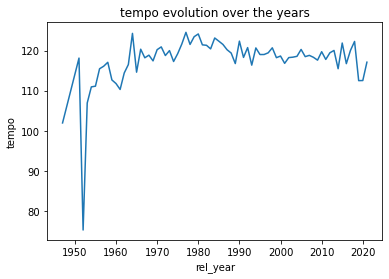

In [137]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

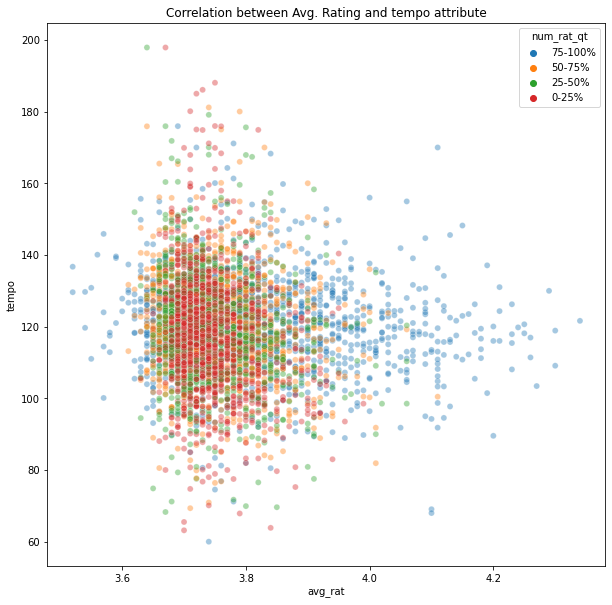

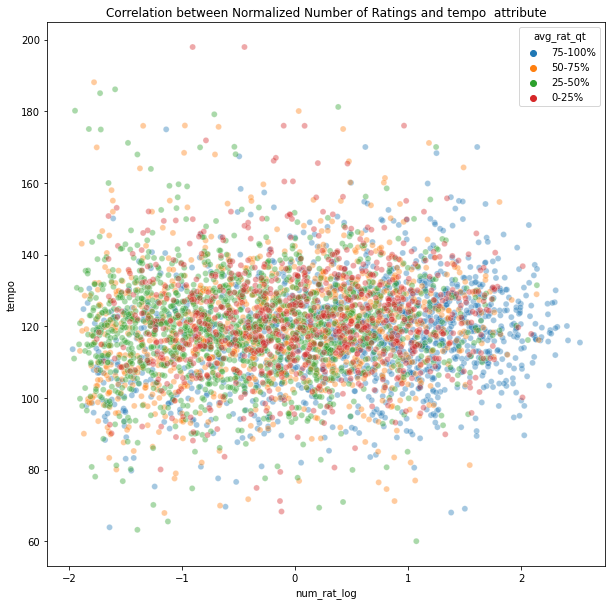

In [138]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

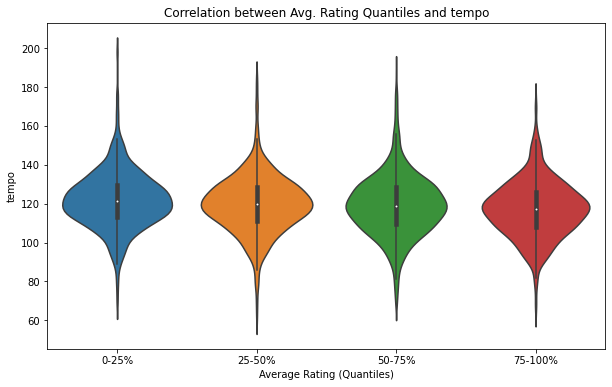

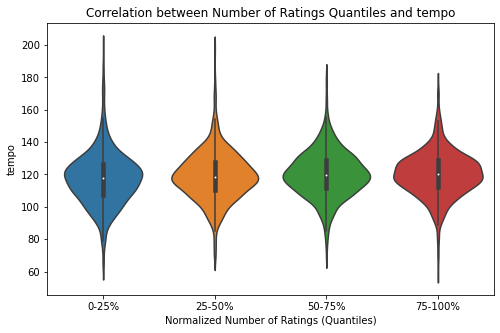

In [278]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

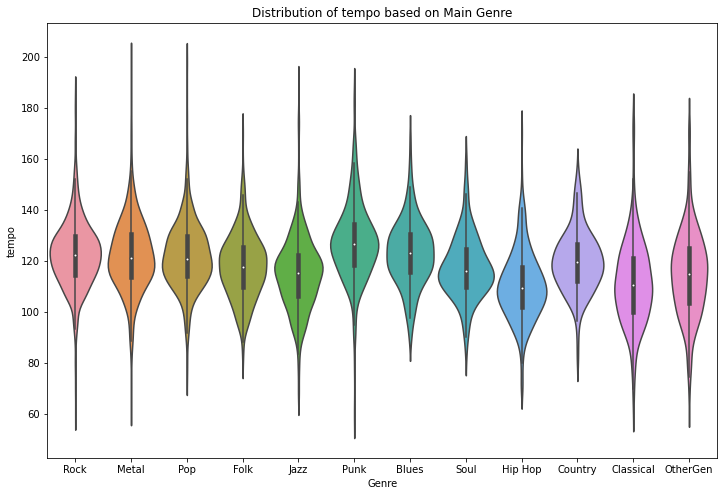

In [280]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp, width = 1)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

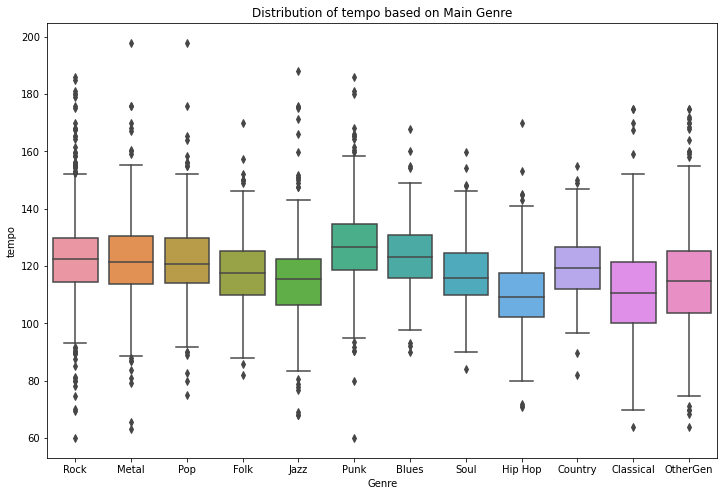

In [281]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

In [284]:
genre_desc.tempo[genre_desc.variable == "Classical"].describe()

count    279.000000
mean     111.524251
std       16.523569
min       63.876000
25%      100.111912
50%      110.681652
75%      121.260767
max      174.940000
Name: tempo, dtype: float64

##### Conclusion

asd

#### `'valence'`

*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*

In [290]:
temp = "valence"

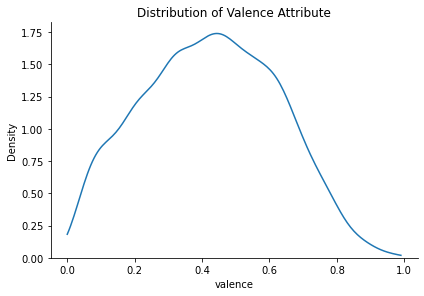

In [291]:
sns.displot(dfs[temp], kind = "kde", height=4, aspect= 1.5, cut = 0);
plt.title("Distribution of Valence Attribute");

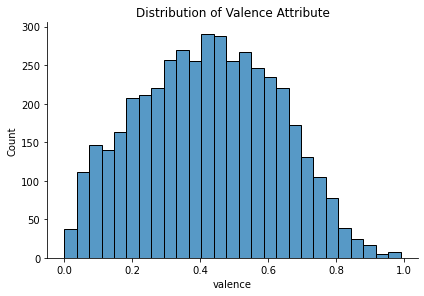

In [292]:
sns.displot(dfs[temp], kind = "hist", height=4, aspect= 1.5);
plt.title("Distribution of Valence Attribute");

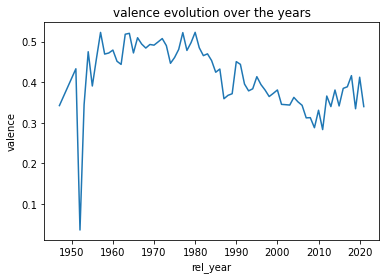

In [293]:
sns.lineplot(data = dfs.groupby("rel_year").mean().reset_index(), x = "rel_year", y = temp)
plt.title(temp + " evolution over the years");

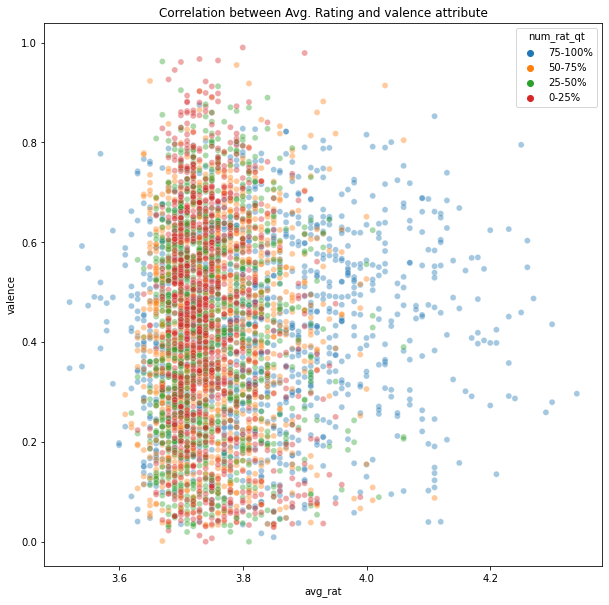

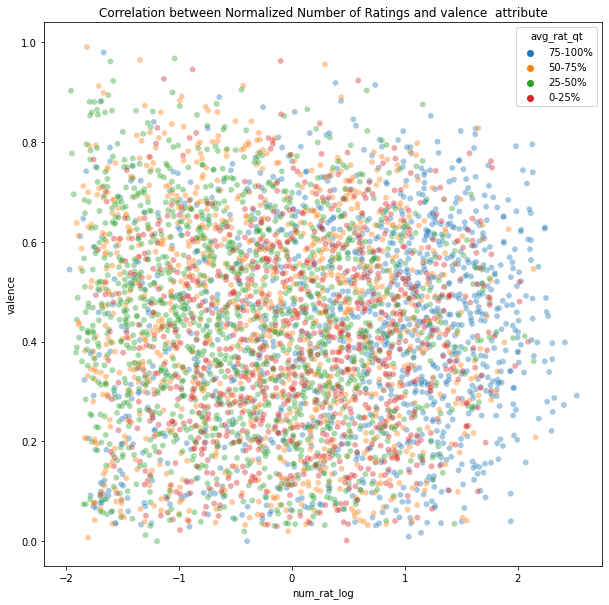

In [294]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "avg_rat", y = temp, alpha= 0.4, hue = "num_rat_qt")
plt.title("Correlation between Avg. Rating and "+temp+" attribute");

plt.figure(figsize = (10,10))
sns.scatterplot(data = dfs, x = "num_rat_log", y = temp,hue = "avg_rat_qt", alpha= 0.4)
plt.title("Correlation between Normalized Number of Ratings and "+temp+"  attribute");

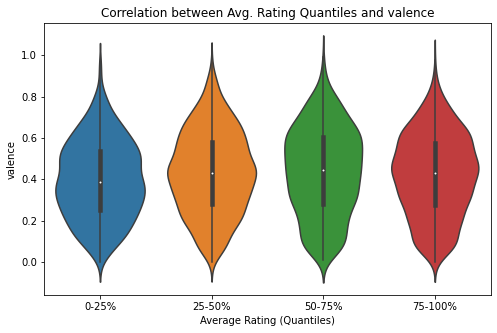

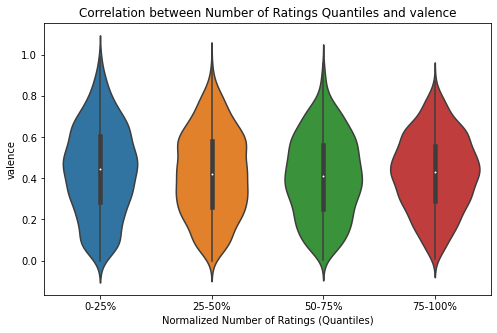

In [300]:
plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (8,5))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

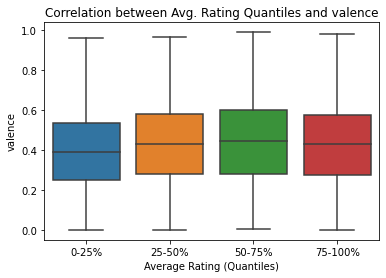

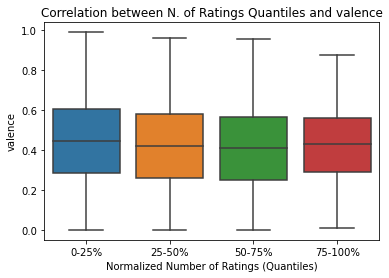

In [303]:
plt.figure(figsize = (6,4))
sns.boxplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.xlabel("Average Rating (Quantiles)");

plt.figure(figsize = (6,4))
sns.boxplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between N. of Ratings Quantiles and "+temp)
plt.xlabel("Normalized Number of Ratings (Quantiles)");

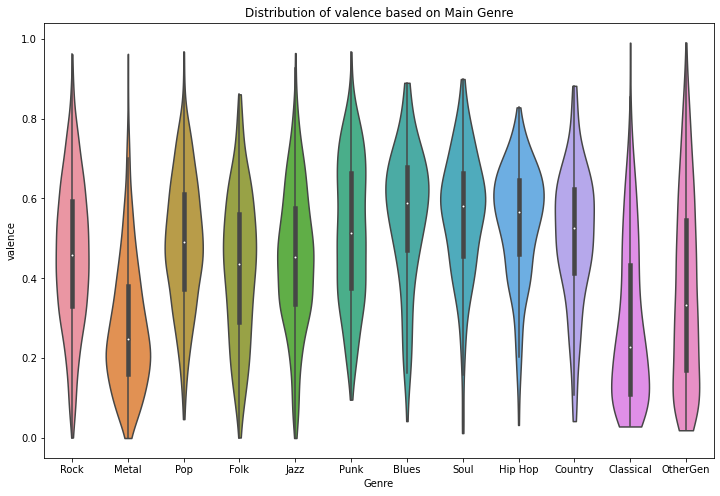

In [304]:
plt.figure(figsize=(12, 8))
sns.violinplot(data = genre_desc, x = "variable", y = temp, cut = 0, width = 0.9)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

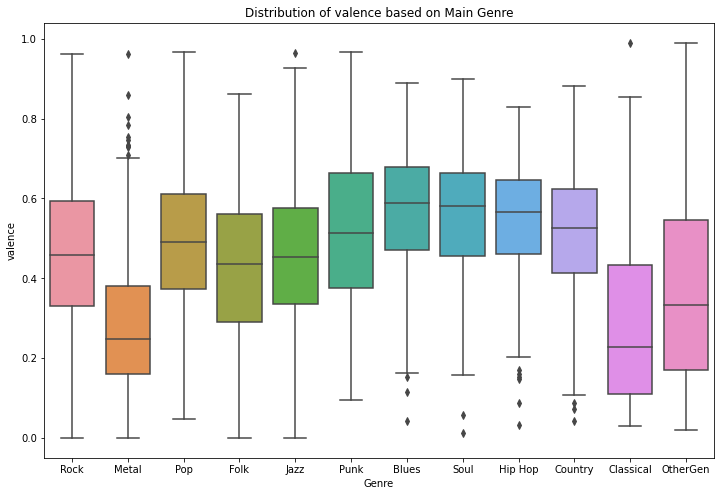

In [307]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.xlabel("Genre");

##### Conclusion

asd

#### `'duration_s'`


**Average track duration?**

> This might explain the outliers in the data, meaning that those are albuns with a few (or only one) long track, which would bring their mean/length up

> this values are consistent with a average song length

In [308]:
temp = "duration_s"

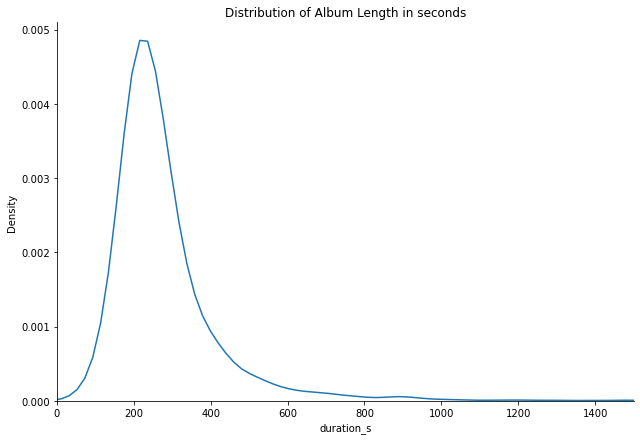

In [266]:
sns.displot(dfs[temp], kind = "kde", height=6, aspect= 1.5)
plt.title("Distribution of Album Length in seconds")
plt.xlim((0, 1500));

Text(0.5, 1.0, 'Distribution of Album Length in seconds')

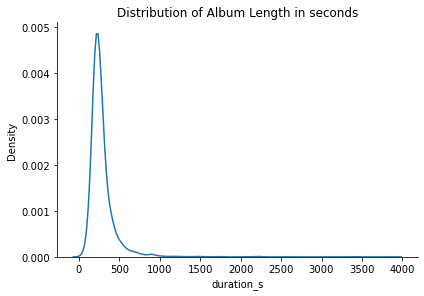

In [310]:
sns.displot(dfs[temp], kind = "kde", height=4, aspect= 1.5)
plt.title("Distribution of Album Length in seconds")
# plt.xlim((0, 1500));

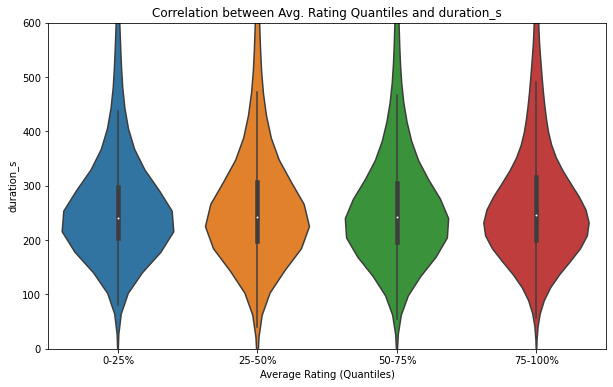

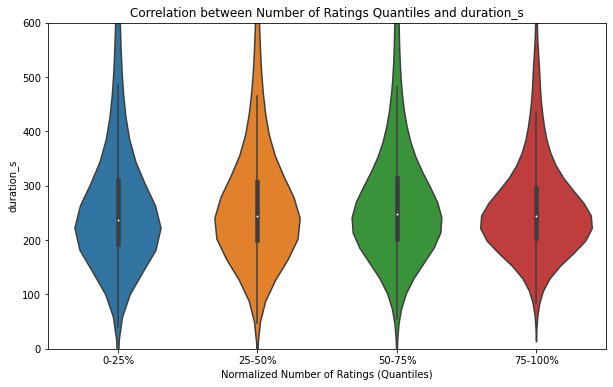

In [267]:
plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "avg_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Avg. Rating Quantiles and "+temp)
plt.ylim((0, 600))
plt.xlabel("Average Rating (Quantiles)");


plt.figure(figsize = (10,6))
sns.violinplot(data = dfs, x = "num_rat_qt", y = temp, order = ["0-25%","25-50%","50-75%","75-100%"])
plt.title("Correlation between Number of Ratings Quantiles and "+temp)
plt.ylim((0, 600))
plt.xlabel("Normalized Number of Ratings (Quantiles)");

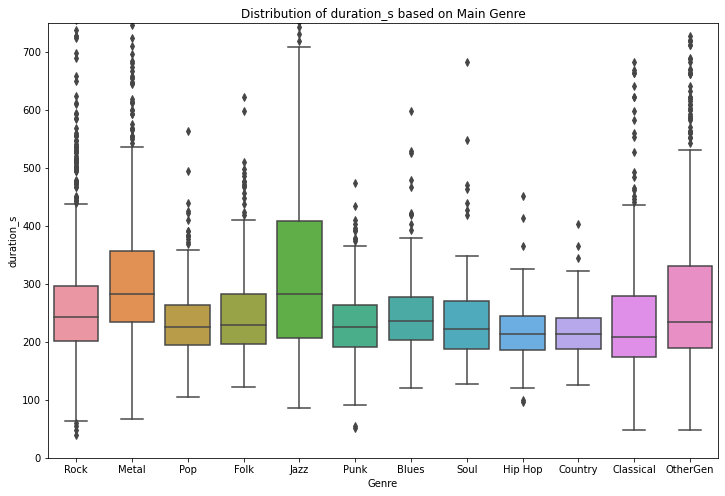

In [268]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = genre_desc, x = "variable", y = temp)
plt.title("Distribution of "+ temp +" based on Main Genre")
plt.ylim((0, 750))
plt.xlabel("Genre");

In [311]:
genre_desc.duration_s[genre_desc.variable == "Jazz"].describe()

count     548.000000
mean      335.847375
std       203.341625
min        85.211545
25%       205.880214
50%       281.744509
75%       409.217650
max      2241.880000
Name: duration_s, dtype: float64

In [313]:
genre_desc.duration_s[genre_desc.variable == "Jazz"].quantile(0.8)

441.1616666666668

In [151]:
# dfs.sort_values("duration_s", ascending = True).head(20)

TO-DO

get a sorted by `duration_s` to see if is there anything wrong, or i don't know

is, most of the duration doesn't match the albuns true length, why? it seems that the duration is related to a singel song on the album, and albuns that have only one song have this distorted measure

##### Conclusion

asd

#### `'time_signature'`

*An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".*

\>= 3  <= 7

##### `time_signature` decoding

One source says its a time signature, that can range from 3 to 7 (as in *3/4* or *7/4* time signature)

The data ranges from 1 to 5, and we can see that some of the data is a fraction o *X/3*, some have a *X.X000* format

From Source: *An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).* 

https://search.r-project.org/CRAN/refmans/billboard/html/spotify_track_data.html

From Source2: *time_signature*  -  ***integer***

*An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".*

*\>= 3  <= 7*

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

In [152]:
dfs.time_signature.value_counts().head(20)

4.000000    1581
3.900000     127
3.800000     124
3.750000     115
3.916667     104
3.875000     104
3.833333      98
3.666667      96
3.500000      87
3.888889      83
3.909091      83
3.857143      69
3.923077      66
3.600000      66
3.928571      55
3.700000      49
3.818182      47
3.937500      47
3.846154      46
3.933333      44
Name: time_signature, dtype: int64

In [153]:
dfs.time_signature.describe()

count    4402.000000
mean        3.855067
std         0.226416
min         1.000000
25%         3.769231
50%         3.916667
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

(3.0, 4.5)

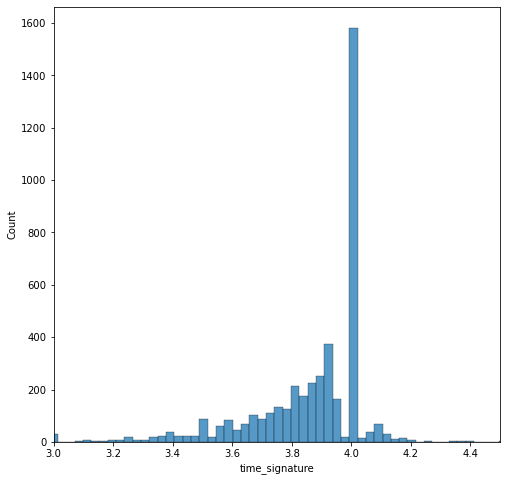

In [154]:
plt.figure(figsize=(8,8))
sns.histplot(data = dfs, x = "time_signature")
plt.xlim((3, 4.5))

(0.0, 450.0)

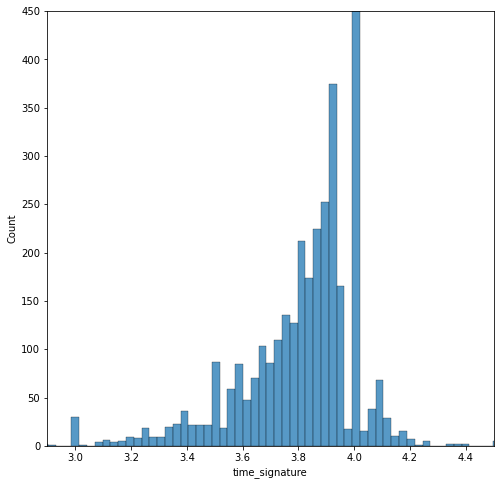

In [155]:
plt.figure(figsize=(8,8))
sns.histplot(data = dfs, x = "time_signature")
plt.xlim((2.9, 4.5))
plt.ylim((0, 450))

___
## Machine Learning

### Projects

#### Use NLP to get `genre` (or rating) from `descs`
- Naive Bayes + NLP

> `genre` works somewhat similar to the algos based on *music descriptors*, hovering aroung the **55-60%**

> no luck getting any regression model for `avg_rat` prediction

#### Guess `genre` based on *music descriptors*
- KNN
- Logistic Regression
- SVM

> they all have a similar **55-60%** score, and all have the same problem of `Rock` and `OtherGen` being overepresented and having other genres missclassified as them

#### Unsurpervised Clustering compared, to see `genres` that are similar
- K means clustering

#### Guess `avg_rat` or `num_rat` based on *music descriptors*, `genre`, `rel_year`, etc
- PCA on *music descriptors*


___
### Data Normalization

**Normalization**

- `loudness` - minmax, z, log?
- `tempo` - minmax
- `duration` - to use it? discard?
- `time_signature` - ????
- `rel_year` - minmax

**Need**

- music descriptors *Normalized*
- eval metrics
- all genre classes
- main genre class

**Labels/Target**

- `avg_rat`
- `num_rat`, `num_rat_log`, `num_rat_qt`
- `main_gen`
- ['Rock', 'Metal', 'Pop', 'Folk', 'Jazz', 'Punk', 'Blues', 'Soul', 'Hip Hop', 'Country', 'OtherGen']
- 

In [156]:
dfs_ml = dfs_gen[['descs', 'avg_rat', 'num_rat', 'num_revs',
        'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'time_signature', 'rel_year', 
       'num_rat_log', 'num_revs_log', 
       'num_rat_qt', 'num_rev_qt', 'avg_rat_qt', 
       'gen1', 'gen2', 'gen3', 
       'Rock', 'Metal', 'Pop', 'Folk', 'Jazz', 'Punk', 'Blues',
       'Soul', 'Hip Hop', 'Country', 'Classical', 'OtherGen',
       'main_gen']].copy()

In [157]:
ml_music_desc = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'time_signature', 'rel_year']

In [158]:
dfs_ml.head()

descs  avg_rat  num_rat  \
0  melancholic, anxious, futuristic, alienation, ...     4.23    70382   
1  melancholic, atmospheric, progressive, male vo...     4.29    48662   
2  fantasy, epic, progressive, philosophical, com...     4.30    44943   
3  cold, melancholic, futuristic, atmospheric, an...     4.21    58590   
4  political, conscious, poetic, protest, concept...     4.27    44206   

   num_revs  acousticness  danceability    energy  instrumentalness  liveness  \
0      1531      0.135763      0.288083  0.565917          0.161053  0.159375   
1       983      0.602800      0.373600  0.409800          0.363040  0.384940   
2       870      0.297686      0.340625  0.370475          0.327265  0.149138   
3       734      0.123219      0.601294  0.676706          0.000669  0.311412   
4       379      0.322889      0.590750  0.707625          0.000011  0.318419   

    loudness  ...  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country Classical  \
0  -9.102417  ...     0     0     0      0     0        0        0         0   
1 -12.689400  ...     0     0     0      0     0        0        0         0   
2 -14.873125  ...     0     0     0      0     0        0        0         0   
3  -7.811941  ...     0     0     0      0     0        0        0         0   
4  -5.802062  ...     0     1     0      0     0        1        0         0   

  OtherGen main_gen  
0        0     Rock  
1        0     Rock  
2        0     Rock  
3        0     Rock  
4        0  Hip Hop  

[5 rows x 36 columns]

In [159]:
from sklearn.preprocessing import MinMaxScaler


In [160]:
scaler = MinMaxScaler()
dfs_ml["tempo"] = scaler.fit_transform(np.reshape(dfs_ml["tempo"].values,(-1,1)))

In [161]:
scaler = MinMaxScaler()
dfs_ml["rel_year"] = scaler.fit_transform(np.reshape(dfs_ml["rel_year"].values,(-1,1)))

In [162]:
scaler = MinMaxScaler()
dfs_ml["time_signature"] = scaler.fit_transform(np.reshape(dfs_ml["time_signature"].values,(-1,1)))

In [163]:
log_transformer = PowerTransformer()
dfs_ml["loudness"] = log_transformer.fit_transform(np.reshape(dfs_ml["loudness"].values, (-1,1)))
scaler = MinMaxScaler()
dfs_ml["loudness"] = scaler.fit_transform(np.reshape(dfs_ml["loudness"].values,(-1,1)))

In [164]:
dfs_ml.head()

descs  avg_rat  num_rat  \
0  melancholic, anxious, futuristic, alienation, ...     4.23    70382   
1  melancholic, atmospheric, progressive, male vo...     4.29    48662   
2  fantasy, epic, progressive, philosophical, com...     4.30    44943   
3  cold, melancholic, futuristic, atmospheric, an...     4.21    58590   
4  political, conscious, poetic, protest, concept...     4.27    44206   

   num_revs  acousticness  danceability    energy  instrumentalness  liveness  \
0      1531      0.135763      0.288083  0.565917          0.161053  0.159375   
1       983      0.602800      0.373600  0.409800          0.363040  0.384940   
2       870      0.297686      0.340625  0.370475          0.327265  0.149138   
3       734      0.123219      0.601294  0.676706          0.000669  0.311412   
4       379      0.322889      0.590750  0.707625          0.000011  0.318419   

   loudness  ...  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country Classical  \
0  0.308366  ...     0     0     0      0     0        0        0         0   
1  0.247999  ...     0     0     0      0     0        0        0         0   
2  0.218378  ...     0     0     0      0     0        0        0         0   
3  0.335325  ...     0     0     0      0     0        0        0         0   
4  0.386067  ...     0     1     0      0     0        1        0         0   

  OtherGen main_gen  
0        0     Rock  
1        0     Rock  
2        0     Rock  
3        0     Rock  
4        0  Hip Hop  

[5 rows x 36 columns]

In [165]:
dfs_ml[ml_music_desc].head()

acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.135763      0.288083  0.565917          0.161053  0.159375  0.308366   
1      0.602800      0.373600  0.409800          0.363040  0.384940  0.247999   
2      0.297686      0.340625  0.370475          0.327265  0.149138  0.218378   
3      0.123219      0.601294  0.676706          0.000669  0.311412  0.335325   
4      0.322889      0.590750  0.707625          0.000011  0.318419  0.386067   

   speechiness     tempo   valence  time_signature  rel_year  
0     0.056308  0.401970  0.291733        0.750000  0.675676  
1     0.039740  0.507597  0.259040        0.650000  0.378378  
2     0.043463  0.427129  0.279400        0.718750  0.297297  
3     0.268318  0.406279  0.398206        0.764706  0.716216  
4     0.294175  0.314919  0.487187        0.703125  0.918919

In [166]:
dfs_ml[main_genres].head()

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  \
0     1      0    0     0     0     0      0     0        0        0   
1     1      0    0     0     0     0      0     0        0        0   
2     1      0    0     0     0     0      0     0        0        0   
3     1      0    0     0     0     0      0     0        0        0   
4     0      0    0     0     1     0      0     0        1        0   

   Classical  OtherGen  
0          0         0  
1          0         0  
2          0         0  
3          0         0  
4          0         0

### Guess `genre` based on *music descriptors*

**Use a KNN Classifier**

- Normalize features that are not 0-1
- Get features / labels data
    - *how will i choose the main label ?*
    - *should i reduce number of possible labels?*
- Divide between train/test
- Train Algo on n "k"s
- Score/evaluate


In [167]:
from sklearn.model_selection import train_test_split

In [678]:
x = dfs_ml[ml_music_desc].values
y = dfs_ml.main_gen.values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [679]:
x = dfs_ml[ml_music_desc].values
y = dfs_ml[main_genres].values
xb_train, xb_test, yb_train, yb_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

#### KNN Classifier - Single Label

In [680]:
from sklearn.neighbors import KNeighborsClassifier

In [681]:
predict_dict = {'Rock' : "Rock_p",
 'Metal' : "Metal_p", 'Pop' : "Pop_p", 'Folk' : "Folk_p", 'Jazz' : "Jazz_p", 'Punk' : "Punk_p",
 'Blues' : "Blues_p", 'Soul' : "Soul_p", 'Hip Hop' : "Hip Hop_p", 'Country' : "Country_p", 'Classical': "Classical_p",
 'OtherGen': "OtherGen_p"}

In [682]:
for k in [3, 5, 10, 15, 20, 30, 50, 75]:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(x_train, y_train)
    print ("k = " + str(k) + "   , score = ", str(classifier.score(x_test, y_test)))

k = 3   , score =  0.39727582292849034
k = 5   , score =  0.4370034052213394
k = 10   , score =  0.4880817253121453
k = 15   , score =  0.489216799091941
k = 20   , score =  0.5028376844494892
k = 30   , score =  0.49943246311010214
k = 50   , score =  0.49943246311010214
k = 75   , score =  0.49375709421112374


There is a larger jump in accuracy between 3 and 10 k neighbors, but after that it starts to taper off, reaching a maximum accuracy at k = 50, for this reason i'll continue using a K value of 10

In [683]:
k = 15
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train);


In [684]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [685]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Country_p', "OtherGen_p"]].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Rock' , "Rock_p", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'Classical',"Classical_p",'OtherGen', "OtherGen_p"]]

In [686]:
# amount of correct guesses if 2nd Guess considered
test_y[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)]

main_gen y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
2     Hip Hop   Hip Hop     Hip Hop     0  0.000000      0  0.000000    0   
3        Rock      Rock         Pop     1  0.333333      0  0.133333    0   
4        Jazz      Jazz        Jazz     0  0.200000      0  0.066667    0   
5        Punk      Punk        Punk     0  0.133333      0  0.000000    0   
7        Rock      Rock         Pop     1  0.533333      0  0.000000    0   
..        ...       ...         ...   ...       ...    ...       ...  ...   
876     Metal     Metal       Metal     0  0.133333      1  0.466667    0   
877     Metal      Rock       Metal     0  0.400000      1  0.266667    0   
878  OtherGen      Rock    OtherGen     0  0.333333      0  0.000000    0   
879      Rock      Rock        Punk     1  0.733333      0  0.000000    0   
880     Metal     Metal       Metal     0  0.333333      1  0.466667    0   

        Pop_p  Folk  ...  Soul    Soul_p  Hip Hop  Hip Hop_p  Country  \
2    0.000000     0  ...     0  0.000000        1   0.866667        0   
3    0.266667     0  ...     0  0.000000        0   0.000000        0   
4    0.000000     0  ...     0  0.066667        0   0.000000        0   
5    0.200000     0  ...     0  0.000000        0   0.000000        0   
7    0.200000     0  ...     0  0.000000        0   0.066667        0   
..        ...   ...  ...   ...       ...      ...        ...      ...   
876  0.000000     0  ...     0  0.000000        0   0.000000        0   
877  0.000000     0  ...     0  0.000000        0   0.000000        0   
878  0.000000     0  ...     0  0.066667        0   0.000000        0   
879  0.066667     0  ...     0  0.000000        0   0.000000        0   
880  0.000000     0  ...     0  0.000000        0   0.000000        0   

     Country_p  Classical  Classical_p  OtherGen  OtherGen_p  
2          0.0          0     0.000000         0    0.066667  
3          0.0          0     0.000000         0    0.066667  
4          0.0          0     0.000000         0    0.200000  
5          0.0          0     0.000000         0    0.133333  
7          0.0          0     0.000000         0    0.133333  
..         ...        ...          ...       ...         ...  
876        0.0          0     0.000000         0    0.133333  
877        0.0          0     0.000000         0    0.200000  
878        0.0          0     0.000000         1    0.266667  
879        0.0          0     0.000000         0    0.066667  
880        0.0          0     0.066667         0    0.133333  

[512 rows x 27 columns]

In [687]:
print ("k = " + str(k) + "   , score = ", str(classifier.score(x_test, y_test)))

k = 15   , score =  0.489216799091941


In [688]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

512
0.5811577752553916


In [695]:
# creates a df score_y to count correct/missed classifications for each genre
score_y = pd.DataFrame(columns=["total", "correct", "2nd correct", "missed", "false_pos"])

for gen in main_genres:
    total = test_y.main_gen[test_y.main_gen == gen].count()
    score_y.loc[gen] = [total
        ,test_y.main_gen[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict))&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict))&(test_y.main_gen == gen)].count() 
        ,test_y.main_gen[((test_y.y_predict == gen))&(test_y.main_gen != gen)].count() 
         ]

score_y["correct%"] = 100*score_y.correct / score_y.total
score_y["2nd correct%"] = 100*score_y["2nd correct"] / score_y.total
score_y["missed%"] = 100*score_y.missed / score_y.total
score_y["Precision"] = 100*score_y.correct / (score_y.correct + score_y.false_pos)

In [696]:
score_y

total correct 2nd correct missed false_pos   correct% 2nd correct%  \
Rock        255     179         179     76       191  70.196078    70.196078   
Metal       129      94         108     21        56  72.868217     83.72093   
Pop          73       6          26     47        34   8.219178    35.616438   
Folk         27       5           6     21        17  18.518519    22.222222   
Jazz         90      43          59     31        34  47.777778    65.555556   
Punk         44       8          11     33         8  18.181818         25.0   
Blues        18       0           0     18         1        0.0          0.0   
Soul         21       2           5     16         3    9.52381    23.809524   
Hip Hop      61      50          51     10        21  81.967213    83.606557   
Country      21       1           2     19         6   4.761905      9.52381   
Classical    55      31          31     24        44  56.363636    56.363636   
OtherGen     87      12          34     53        35  13.793103     39.08046   

             missed%  Precision  
Rock       29.803922  48.378378  
Metal       16.27907  62.666667  
Pop        64.383562       15.0  
Folk       77.777778  22.727273  
Jazz       34.444444  55.844156  
Punk            75.0       50.0  
Blues          100.0        0.0  
Soul       76.190476       40.0  
Hip Hop    16.393443  70.422535  
Country     90.47619  14.285714  
Classical  43.636364  41.333333  
OtherGen    60.91954  25.531915

In [691]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

In [692]:
# missclass

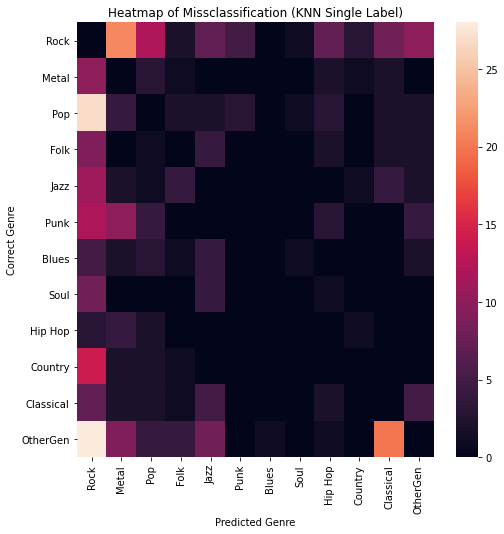

In [590]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre")
plt.title("Heatmap of Missclassification (KNN Single Label)");

One of the problems is that `OtherGen` encompasses all other genres, and because of that it has a large variation of encompassing music descriptors, so any one item that isn't that similar to the "typical" item in their respective genre, is likely to be classified as "OtherGen"

When we consider the second highest probability score (that isn't OtherGen) we can increase our classification score from 51% to 57%, still not that high, but considerably higher

We can see that it appears most missclassfication occurs between less popular genres that as guessed as Rock (or OtherGen)

#### KNN Classifier - Multi Label Label

In [495]:
for k in [3, 5, 10, 15, 20, 30, 50, 75]:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(xb_train, yb_train)
    print ("k = " + str(k) + "   , score = ", str(classifier.score(xb_test, yb_test)))

k = 3   , score =  0.2939841089670829
k = 5   , score =  0.2905788876276958
k = 10   , score =  0.26787741203178206
k = 15   , score =  0.28717366628830876
k = 20   , score =  0.27128263337116915
k = 30   , score =  0.2724177071509648
k = 50   , score =  0.2599318955732123
k = 75   , score =  0.24404086265607264


In [496]:
k = 15
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(xb_train, yb_train);


In [497]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [498]:
# Creates a DataFrame w/ Correct and predicted classes
predicted = pd.DataFrame(classifier.predict(xb_test), columns=predict_dict.values())
predicted_prob = pd.DataFrame(np.transpose(np.array([[item[1] for item in classifier.predict_proba(xb_test)[i][:]] for i in range(12)])),
 columns = [gen + "_prob" for gen in main_genres])
test_y = pd.concat([test_y , predicted, predicted_prob], axis = 1)


test_y = test_y[["Rock", "Rock_p", "Rock_prob",
"Metal", "Metal_p", "Metal_prob",
"Pop", "Pop_p", "Pop_prob",
"Folk", "Folk_p", "Folk_prob",
"Jazz", "Jazz_p", "Jazz_prob",
"Punk", "Punk_p", "Punk_prob",
"Blues", "Blues_p", "Blues_prob",
"Soul", "Soul_p", "Soul_prob",
"Hip Hop", "Hip Hop_p", "Hip Hop_prob",
"Country", "Country_p", "Country_prob",
"Classical", "Classical_p", "Classical_prob",
"OtherGen", "OtherGen_p", "OtherGen_prob"]]

In [499]:
test_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rock            881 non-null    int64  
 1   Rock_p          881 non-null    int64  
 2   Rock_prob       881 non-null    float64
 3   Metal           881 non-null    int64  
 4   Metal_p         881 non-null    int64  
 5   Metal_prob      881 non-null    float64
 6   Pop             881 non-null    int64  
 7   Pop_p           881 non-null    int64  
 8   Pop_prob        881 non-null    float64
 9   Folk            881 non-null    int64  
 10  Folk_p          881 non-null    int64  
 11  Folk_prob       881 non-null    float64
 12  Jazz            881 non-null    int64  
 13  Jazz_p          881 non-null    int64  
 14  Jazz_prob       881 non-null    float64
 15  Punk            881 non-null    int64  
 16  Punk_p          881 non-null    int64  
 17  Punk_prob       881 non-null    flo

In [500]:
# we're getting a lot of instances that aren't beiong classified as anything, why????

In [501]:
predicted[predicted.sum(axis=1) > 1].sum()

Rock_p          9
Metal_p         0
Pop_p           2
Folk_p          0
Jazz_p          1
Punk_p          6
Blues_p         0
Soul_p          0
Hip Hop_p       0
Country_p       0
Classical_p    36
OtherGen_p     36
dtype: int64

In [502]:
predicted[predicted.sum(axis=1) == 1].sum()

Rock_p         238
Metal_p        118
Pop_p            5
Folk_p           9
Jazz_p          37
Punk_p           5
Blues_p          0
Soul_p           0
Hip Hop_p       50
Country_p        0
Classical_p      2
OtherGen_p      38
dtype: int64

#### Logistic Regression

In [503]:
from sklearn.linear_model import LogisticRegression

In [669]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [670]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [671]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [672]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = model.predict(x_test)
predicted = pd.DataFrame(model.predict_proba(x_test), columns=model.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Classical_p', 'Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Rock' , "Rock_p", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'Classical',"Classical_p",'OtherGen', "OtherGen_p"]]

In [673]:
test_y

main_gen  y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
0        Rock  Classical   Classical     1  0.113731      0  0.196306    0   
1        Jazz  Classical   Classical     0  0.076162      0  0.016667    0   
2     Hip Hop    Hip Hop     Hip Hop     0  0.108768      0  0.052978    0   
3        Rock       Rock       Metal     1  0.344483      0  0.251308    0   
4        Jazz       Rock        Jazz     0  0.322595      0  0.020452    0   
..        ...        ...         ...   ...       ...    ...       ...  ...   
876     Metal      Metal       Metal     0  0.242748      1  0.577316    0   
877     Metal      Metal       Metal     0  0.299341      1  0.413105    0   
878  OtherGen       Jazz        Jazz     0  0.220927      0  0.004943    0   
879      Rock       Rock        Jazz     1  0.574020      0  0.047093    0   
880     Metal      Metal       Metal     0  0.246927      1  0.398607    0   

        Pop_p  Folk  ...  Soul    Soul_p  Hip Hop  Hip Hop_p  Country  \
0    0.083939     1  ...     0  0.001530        0   0.016944        0   
1    0.011750     0  ...     0  0.001757        0   0.000200        0   
2    0.050033     0  ...     0  0.037070        1   0.541319        0   
3    0.110905     0  ...     0  0.006389        0   0.022167        0   
4    0.097629     0  ...     0  0.028724        0   0.012707        0   
..        ...   ...  ...   ...       ...      ...        ...      ...   
876  0.030061     0  ...     0  0.001448        0   0.004946        0   
877  0.049196     0  ...     0  0.005306        0   0.022745        0   
878  0.063533     0  ...     0  0.126694        0   0.019167        0   
879  0.049642     0  ...     0  0.025498        0   0.003880        0   
880  0.064402     0  ...     0  0.012106        0   0.075306        0   

     Country_p  Classical  Classical_p  OtherGen  OtherGen_p  
0     0.010096          1     0.351599         0    0.181433  
1     0.003530          0     0.416622         0    0.211982  
2     0.011866          0     0.009489         0    0.101623  
3     0.007714          0     0.045715         0    0.131284  
4     0.008850          0     0.045521         0    0.249178  
..         ...        ...          ...       ...         ...  
876   0.001135          0     0.022321         0    0.062691  
877   0.002543          0     0.010296         0    0.070540  
878   0.022821          0     0.007492         1    0.150709  
879   0.003876          0     0.009144         0    0.083880  
880   0.007495          0     0.006208         0    0.067103  

[881 rows x 27 columns]

In [674]:
model.score(x_test, y_test)

0.49148694665153236

In [675]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

525
0.5959137343927355


The Model doesn't really converge, even if we increase the number of iterations/params

We can assume that there is not enough distinct characteristics in the music descriptors to classify genres with higher precision than this

We can explore chat may be causing a such a high missclassification ration

Some of the ways we can do that are:
- Explore the influence of `Rock` and `OtherGen`
- Reduce the amount of genres it tries to differentiate
- ?

In [676]:
# creates a df score_y to count correct/missed classifications for each genre
score_y = pd.DataFrame(columns=["total", "correct", "2nd correct", "missed", "false_pos"])

for gen in main_genres:
    total = test_y.main_gen[test_y.main_gen == gen].count()
    score_y.loc[gen] = [total
        ,test_y.main_gen[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict))&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict))&(test_y.main_gen == gen)].count() 
        ,test_y.main_gen[((test_y.y_predict == gen))&(test_y.main_gen != gen)].count() 
         ]

score_y["correct%"] = 100*score_y.correct / score_y.total
score_y["2nd correct%"] = 100*score_y["2nd correct"] / score_y.total
score_y["missed%"] = 100*score_y.missed / score_y.total
# score_y["Recall"] = score_y.correct / (score_y.correct + )

In [677]:
score_y

total correct 2nd correct missed false_pos   correct% 2nd correct%  \
Rock        255     209         209     46       244  81.960784    81.960784   
Metal       129      91         109     20        56  70.542636    84.496124   
Pop          73       1          29     44         5   1.369863    39.726027   
Folk         27       4           4     23         8  14.814815    14.814815   
Jazz         90      50          72     18        37  55.555556         80.0   
Punk         44       0           8     36         0        0.0    18.181818   
Blues        18       0           0     18         0        0.0          0.0   
Soul         21       0           0     21         0        0.0          0.0   
Hip Hop      61      49          53      8        25  80.327869    86.885246   
Country      21       0           0     21         0        0.0          0.0   
Classical    55      18          30     25        33  32.727273    54.545455   
OtherGen     87      11          11     76        40  12.643678    12.643678   

             missed%  
Rock       18.039216  
Metal      15.503876  
Pop        60.273973  
Folk       85.185185  
Jazz            20.0  
Punk       81.818182  
Blues          100.0  
Soul           100.0  
Hip Hop    13.114754  
Country        100.0  
Classical  45.454545  
OtherGen   87.356322

In [ ]:
score_y

In [577]:
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

In [578]:
# missclass

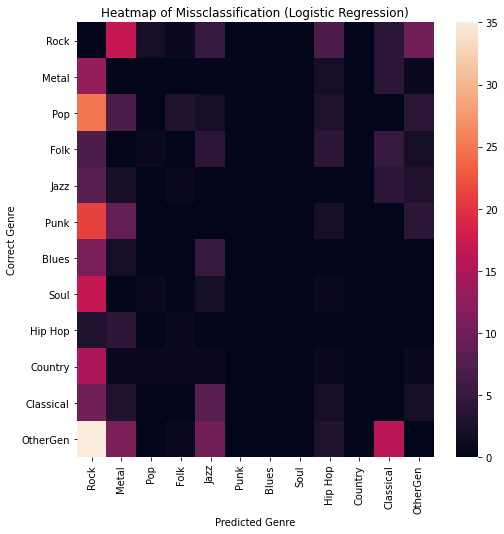

In [579]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre")
plt.title("Heatmap of Missclassification (Logistic Regression)");

#### SVM

In [516]:
from sklearn.svm import SVC

In [517]:
classifier = SVC(kernel = 'rbf', C = 5, gamma = 2)
classifier.fit(x_train, y_train);

In [518]:
classifier.score(x_test, y_test)

0.5244040862656073

In [697]:
classifier = SVC(kernel = 'poly', degree = 3, C = 5)
classifier.fit(x_train, y_train);

In [698]:
classifier.score(x_test, y_test)

0.5198637911464246

In [699]:
classifier = SVC(kernel = 'rbf', C = 5, gamma = 2, probability=True)
classifier.fit(x_train, y_train);

In [700]:
classifier.predict_proba(x_test).shape

(881, 12)

In [701]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [702]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Classical_p','Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Rock' , "Rock_p", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'Classical',"Classical_p",'OtherGen', "OtherGen_p"]]

In [703]:
# amount of correct guesses if 2nd Guess considered
test_y[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)]

main_gen y_predict alt_predict  Rock    Rock_p  Metal   Metal_p  Pop  \
2     Hip Hop   Hip Hop     Hip Hop     0  0.048032      0  0.046275    0   
3        Rock      Rock         Pop     1  0.500246      0  0.113398    0   
4        Jazz      Rock        Jazz     0  0.260397      0  0.071405    0   
5        Punk      Rock        Punk     0  0.245268      0  0.021659    0   
7        Rock      Rock         Pop     1  0.553312      0  0.027232    0   
..        ...       ...         ...   ...       ...    ...       ...  ...   
876     Metal     Metal       Metal     0  0.100075      1  0.706324    0   
877     Metal     Metal       Metal     0  0.113174      1  0.678045    0   
878  OtherGen  OtherGen        Jazz     0  0.236628      0  0.003879    0   
879      Rock      Rock        Jazz     1  0.584487      0  0.018590    0   
880     Metal     Metal       Metal     0  0.236493      1  0.453838    0   

        Pop_p  Folk  ...  Soul    Soul_p  Hip Hop  Hip Hop_p  Country  \
2    0.015172     0  ...     0  0.010442        1   0.700977        0   
3    0.153953     0  ...     0  0.004698        0   0.010326        0   
4    0.060946     0  ...     0  0.016719        0   0.013365        0   
5    0.102759     0  ...     0  0.015236        0   0.008635        0   
7    0.190265     0  ...     0  0.006543        0   0.028772        0   
..        ...   ...  ...   ...       ...      ...        ...      ...   
876  0.015399     0  ...     0  0.001970        0   0.001337        0   
877  0.043232     0  ...     0  0.001852        0   0.002459        0   
878  0.037746     0  ...     0  0.056826        0   0.001906        0   
879  0.082958     0  ...     0  0.055622        0   0.001785        0   
880  0.043494     0  ...     0  0.004157        0   0.028074        0   

     Country_p  Classical  Classical_p  OtherGen  OtherGen_p  
2     0.008406          0     0.020072         0    0.117614  
3     0.011392          0     0.014841         0    0.094494  
4     0.021503          0     0.046155         0    0.129153  
5     0.012597          0     0.019788         0    0.086325  
7     0.015920          0     0.013046         0    0.092301  
..         ...        ...          ...       ...         ...  
876   0.002433          0     0.002738         0    0.051489  
877   0.006675          0     0.004695         0    0.050787  
878   0.010326          0     0.027906         1    0.420462  
879   0.010267          0     0.023397         0    0.050700  
880   0.014109          0     0.019473         0    0.094216  

[557 rows x 27 columns]

In [704]:
print ("score = ", str(classifier.score(x_test, y_test)))

score =  0.5244040862656073


In [705]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

557
0.6322360953461975


In [708]:
# creates a df score_y to count correct/missed classifications for each genre
score_y = pd.DataFrame(columns=["total", "correct", "2nd correct", "missed", "false_pos"])

for gen in main_genres:
    total = test_y.main_gen[test_y.main_gen == gen].count()
    score_y.loc[gen] = [total
        ,test_y.main_gen[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict))&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict))&(test_y.main_gen == gen)].count() 
        ,test_y.main_gen[((test_y.y_predict == gen))&(test_y.main_gen != gen)].count() 
         ]

score_y["correct%"] = 100*score_y.correct / score_y.total
score_y["2nd correct%"] = 100*score_y["2nd correct"] / score_y.total
score_y["missed%"] = 100*score_y.missed / score_y.total
score_y["Precision"] = 100*score_y.correct / (score_y.correct + score_y.false_pos + 0.0000001)

In [709]:
score_y

total correct 2nd correct missed false_pos   correct% 2nd correct%  \
Rock        255     213         213     42       227  83.529412    83.529412   
Metal       129      95         110     19        38  73.643411    85.271318   
Pop          73       1          29     44         9   1.369863    39.726027   
Folk         27       4           5     22        17  14.814815    18.518519   
Jazz         90      50          70     20        30  55.555556    77.777778   
Punk         44       0          13     31         0        0.0    29.545455   
Blues        18       2           2     16         1  11.111111    11.111111   
Soul         21       0           8     13         0        0.0    38.095238   
Hip Hop      61      51          53      8        17  83.606557    86.885246   
Country      21       0           0     21         2        0.0          0.0   
Classical    55      26          34     21        41  47.272727    61.818182   
OtherGen     87      20          20     67        37  22.988506    22.988506   

             missed%  Precision  
Rock       16.470588  48.409091  
Metal      14.728682  71.428571  
Pop        60.273973       10.0  
Folk       81.481481  19.047619  
Jazz       22.222222       62.5  
Punk       70.454545        0.0  
Blues      88.888889  66.666664  
Soul       61.904762        0.0  
Hip Hop    13.114754       75.0  
Country        100.0        0.0  
Classical  38.181818   38.80597  
OtherGen   77.011494  35.087719

In [710]:
score_y[["total", "correct%", "2nd correct%", "Precision"]].rename(columns={"correct%":"Recall one-pred", "2nd correct%":"Recall two-pred"})

total Recall one-pred Recall two-pred  Precision
Rock        255       83.529412       83.529412  48.409091
Metal       129       73.643411       85.271318  71.428571
Pop          73        1.369863       39.726027       10.0
Folk         27       14.814815       18.518519  19.047619
Jazz         90       55.555556       77.777778       62.5
Punk         44             0.0       29.545455        0.0
Blues        18       11.111111       11.111111  66.666664
Soul         21             0.0       38.095238        0.0
Hip Hop      61       83.606557       86.885246       75.0
Country      21             0.0             0.0        0.0
Classical    55       47.272727       61.818182   38.80597
OtherGen     87       22.988506       22.988506  35.087719

In [660]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

In [661]:
missclass

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  \
Rock          0     11    4     1     6     0      0     0        5        0   
Metal        12      0    0     0     0     0      0     0        2        0   
Pop          25      6    0     5     2     0      0     0        3        0   
Folk          8      0    1     0     3     0      0     0        2        0   
Jazz          9      1    0     2     0     0      0     0        0        0   
Punk         16      7    3     0     0     0      0     0        1        0   
Blues         8      1    0     1     3     0      0     0        0        0   
Soul         10      0    0     0     1     0      0     0        1        0   
Hip Hop       4      3    0     0     0     0      0     0        0        1   
Country      14      1    1     3     0     0      0     0        1        0   
Classical    10      0    0     2     7     0      0     0        0        0   
OtherGen     27      8    0     2     8     0      1     0        2        1   

           Classical  OtherGen  
Rock               7         8  
Metal              4         1  
Pop                2         1  
Folk               4         4  
Jazz               6         2  
Punk               0         3  
Blues              0         3  
Soul               0         1  
Hip Hop            0         0  
Country            0         1  
Classical          0         2  
OtherGen          18         0

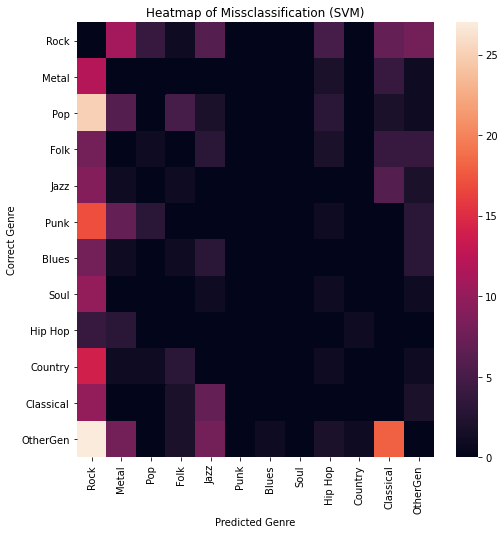

In [567]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre")
plt.title("Heatmap of Missclassification (SVM)");

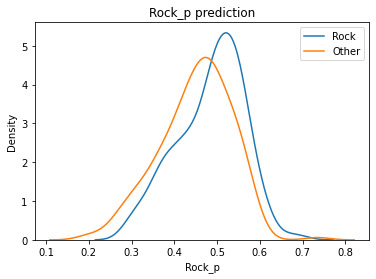

In [533]:

fig, ax = plt.subplots()
sns.kdeplot(test_y.Rock_p[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == "Rock")], ax = ax)
sns.kdeplot(test_y.Rock_p[(test_y.y_predict == "Rock")&(test_y.main_gen != "Rock")], ax = ax)
plt.title("Rock_p prediction")
plt.legend(["Rock", "Other"]);

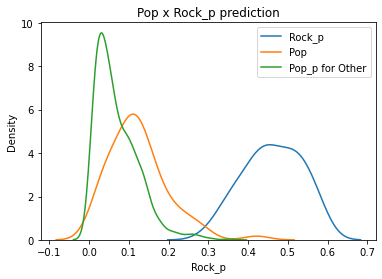

In [534]:
fig, ax = plt.subplots()
sns.kdeplot(test_y.Rock_p[(test_y.y_predict == "Rock")&(test_y.main_gen == "Pop")], ax = ax)
sns.kdeplot(test_y.Pop_p[(test_y.main_gen == "Pop")], ax = ax)
sns.kdeplot(test_y.Pop_p[(test_y.main_gen != "Pop")], ax = ax)
plt.title("Pop x Rock_p prediction")
plt.legend(["Rock_p", "Pop", "Pop_p for Other"]);

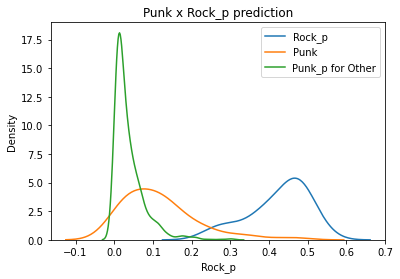

In [535]:
fig, ax = plt.subplots()
sns.kdeplot(test_y.Rock_p[(test_y.y_predict == "Rock")&(test_y.main_gen == "Punk")], ax = ax)
sns.kdeplot(test_y.Punk_p[(test_y.main_gen == "Punk")], ax = ax)
sns.kdeplot(test_y.Punk_p[(test_y.main_gen != "Punk")], ax = ax)
plt.title("Punk x Rock_p prediction")
plt.legend(["Rock_p", "Punk", "Punk_p for Other"]);

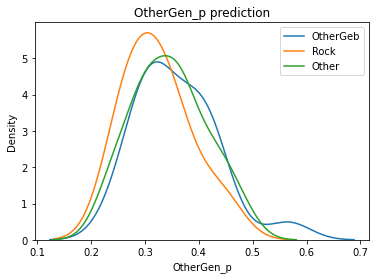

In [536]:
fig, ax = plt.subplots()
sns.kdeplot(test_y.OtherGen_p[(test_y.y_predict == "OtherGen")&(test_y.main_gen == "OtherGen")], ax = ax)
sns.kdeplot(test_y.OtherGen_p[(test_y.y_predict == "OtherGen")&(test_y.main_gen == "Rock")], ax = ax)
sns.kdeplot(test_y.OtherGen_p[(test_y.y_predict == "OtherGen")&(test_y.main_gen != "OtherGen")], ax = ax)
plt.title("OtherGen_p prediction")
plt.legend(["OtherGeb", "Rock", "Other"]);

#### Attempting `genre` Classification where `main_gen` != `Rock`

In [618]:
x = dfs_ml[ml_music_desc][dfs_ml.main_gen != "Rock"].values
y = dfs_ml.main_gen[dfs_ml.main_gen != "Rock"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [619]:
x = dfs_ml[ml_music_desc][dfs_ml.main_gen != "Rock"].values
y = dfs_ml[main_genres][dfs_ml.main_gen != "Rock"].values
xb_train, xb_test, yb_train, yb_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [636]:
k = 10
classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(x_train, y_train);


In [637]:
classifier.score(x_test, y_test)

0.5102685624012638

In [622]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train);

In [623]:
model.score(x_test, y_test)

0.47393364928909953

In [624]:
classifier = SVC(kernel = 'rbf', C = 5, gamma = 2, probability=True)
classifier.fit(x_train, y_train);

In [625]:
classifier.score(x_test, y_test)

0.5276461295418642

In [638]:
test_y = pd.DataFrame(yb_test, columns=main_genres)
test_y["main_gen"] = y_test

In [640]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Classical_p','Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)

test_y = test_y[["main_gen", "y_predict", "alt_predict", 'Metal' , "Metal_p", 'Pop' , "Pop_p", 'Folk' , "Folk_p",
 'Jazz' , "Jazz_p", 'Punk' , "Punk_p", 'Blues' , "Blues_p", 'Soul' , "Soul_p", 'Hip Hop' , "Hip Hop_p", 'Country' , "Country_p",
 'Classical',"Classical_p",'OtherGen', "OtherGen_p"]]

In [641]:
test_y

main_gen  y_predict alt_predict  Metal  Metal_p  Metal_p  Pop  Pop_p  \
0         Pop      Metal       Metal      0      0.5      0.5    1    0.2   
1       Metal      Metal       Metal      1      0.8      0.8    0    0.0   
2    OtherGen        Pop         Pop      0      0.0      0.0    0    0.5   
3    OtherGen  Classical   Classical      0      0.1      0.1    0    0.0   
4        Jazz       Folk        Folk      0      0.1      0.1    0    0.0   
..        ...        ...         ...    ...      ...      ...  ...    ...   
628       Pop  Classical   Classical      0      0.2      0.2    1    0.0   
629   Hip Hop      Metal       Metal      0      0.8      0.8    0    0.0   
630   Hip Hop      Metal       Metal      0      0.4      0.4    0    0.3   
631   Hip Hop    Hip Hop     Hip Hop      0      0.2      0.2    0    0.1   
632     Metal      Metal       Metal      1      0.8      0.8    0    0.0   

     Pop_p  Folk  ...  Hip Hop_p  Country  Country_p  Country_p  Classical  \
0      0.2     0  ...        0.1        0        0.1        0.1          0   
1      0.0     0  ...        0.0        0        0.0        0.0          0   
2      0.5     1  ...        0.0        0        0.1        0.1          0   
3      0.0     0  ...        0.0        0        0.0        0.0          0   
4      0.0     0  ...        0.0        0        0.1        0.1          0   
..     ...   ...  ...        ...      ...        ...        ...        ...   
628    0.0     0  ...        0.0        0        0.0        0.0          0   
629    0.0     0  ...        0.0        0        0.0        0.0          0   
630    0.3     0  ...        0.0        0        0.0        0.0          0   
631    0.1     0  ...        0.4        0        0.0        0.0          0   
632    0.0     0  ...        0.0        0        0.0        0.0          0   

     Classical_p  Classical_p  OtherGen  OtherGen_p  OtherGen_p  
0            0.0          0.0         0         0.1         0.1  
1            0.0          0.0         0         0.1         0.1  
2            0.0          0.0         0         0.2         0.2  
3            0.7          0.7         1         0.2         0.2  
4            0.0          0.0         0         0.2         0.2  
..           ...          ...       ...         ...         ...  
628          0.5          0.5         0         0.1         0.1  
629          0.0          0.0         0         0.0         0.0  
630          0.1          0.1         0         0.1         0.1  
631          0.0          0.0         0         0.3         0.3  
632          0.0          0.0         0         0.1         0.1  

[633 rows x 36 columns]

In [642]:
# creates a df score_y to count correct/missed classifications for each genre
score_y = pd.DataFrame(columns=["total", "correct", "2nd correct", "missed"])

for gen in main_genres:
    total = test_y.main_gen[test_y.main_gen == gen].count()
    score_y.loc[gen] = [total
        ,test_y.main_gen[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == gen)].count() / (total / 100)
        ,test_y.main_gen[((test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict))&(test_y.main_gen == gen)].count() / (total / 100)
        ,test_y.main_gen[((test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict))&(test_y.main_gen == gen)].count()  / (total / 100)
         ]

<ipython-input-642-9debcdd7efae>:7: RuntimeWarning: invalid value encountered in true_divide
  ,test_y.main_gen[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == gen)].count() / (total / 100)
<ipython-input-642-9debcdd7efae>:8: RuntimeWarning: invalid value encountered in true_divide
  ,test_y.main_gen[((test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict))&(test_y.main_gen == gen)].count() / (total / 100)
<ipython-input-642-9debcdd7efae>:9: RuntimeWarning: invalid value encountered in true_divide
  ,test_y.main_gen[((test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict))&(test_y.main_gen == gen)].count()  / (total / 100)


In [643]:
score_y

total    correct  2nd correct      missed
Rock         0.0        NaN          NaN         NaN
Metal      143.0  79.020979    81.118881   18.881119
Pop         65.0  27.692308    38.461538   61.538462
Folk        24.0  12.500000    12.500000   87.500000
Jazz        95.0  65.263158    68.421053   31.578947
Punk        28.0  32.142857    35.714286   64.285714
Blues       10.0   0.000000     0.000000  100.000000
Soul        24.0  29.166667    37.500000   62.500000
Hip Hop     55.0  80.000000    80.000000   20.000000
Country     24.0  25.000000    33.333333   66.666667
Classical   47.0  51.063830    55.319149   44.680851
OtherGen   118.0  31.355932    31.355932   68.644068

In [644]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

In [645]:
missclass

Rock  Metal  Pop  Folk  Jazz  Punk  Blues  Soul  Hip Hop  Country  \
Rock          0      0    0     0     0     0      0     0        0        0   
Metal         0      0    7     0     2     4      0     2        3        0   
Pop           0     10    0     1     5    10      0     1        4        2   
Folk          0      1    3     0     5     0      0     2        1        0   
Jazz          0      3    3     3     0     3      1     1        0        1   
Punk          0      8    2     0     0     0      0     0        1        1   
Blues         0      0    1     0     4     0      0     2        0        0   
Soul          0      1    4     0     1     0      1     0        1        2   
Hip Hop       0      4    2     1     0     0      0     0        0        1   
Country       0      0    7     2     2     1      1     0        2        0   
Classical     0      2    4     2     7     0      0     0        2        0   
OtherGen      0     12   14    10    19     1      1     2       11        2   

           Classical  OtherGen  
Rock               0         0  
Metal              4         5  
Pop                4         3  
Folk               6         3  
Jazz               5        10  
Punk               0         6  
Blues              1         2  
Soul               0         5  
Hip Hop            1         2  
Country            1         0  
Classical          0         4  
OtherGen           9         0

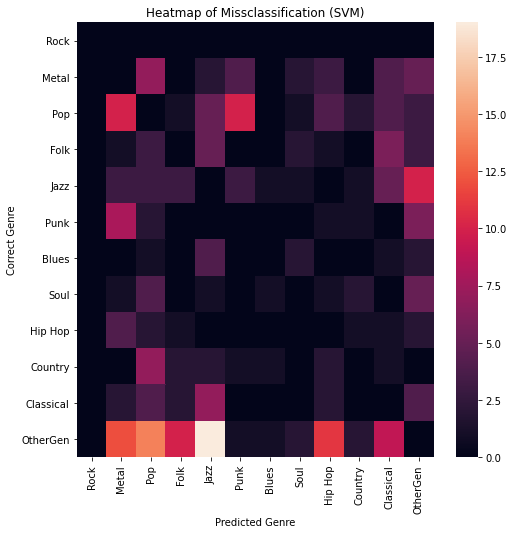

In [646]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre")
plt.title("Heatmap of Missclassification (SVM)");

___
### Use NLP to get `genre` (or rating) from `descs` 

#### Naive Bayes Classifier - Genre based on descs

In [537]:
# from sklearn.metrics import accuracy_score
# accuracy_score(test_labels, predictions)

# from sklearn.metrics import confusion_matrix
# confusion_matrix(test_labels, predictions)


In [538]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [539]:
### comment/uncomment one of these lines to choose

# dfs_ml.descs.fillna("", inplace=True) ## if you want to include those without a descs
# dfs_ml.descs[dfs_ml.descs == ""] = np.nan ## to reinclude them in the model

In [711]:
x = dfs_ml["descs"][dfs_ml.descs.isna() == False].values
y = dfs_ml.main_gen[dfs_ml.descs.isna() == False].values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [712]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test);

In [713]:
classifier = MultinomialNB()
classifier.fit(x_train, y_train);

In [714]:
test_y = pd.DataFrame(y_test).rename(columns = { 0 : "main_gen"})

In [715]:
# Creates a DataFrame w/ Correct and predicted classes
test_y["y_predict"] = classifier.predict(x_test)
predicted = pd.DataFrame(classifier.predict_proba(x_test), columns=classifier.classes_).rename(columns = predict_dict)
test_y = pd.concat([test_y , predicted], axis = 1)

# gets a 2nd guessed class (that's different than OtherGen)
test_y["alt_predict"] = test_y.apply(lambda x : x[['Rock_p', 'Metal_p', 'Pop_p', 'Folk_p', 'Jazz_p', 'Punk_p', 
'Blues_p', 'Soul_p', 'Hip Hop_p', 'Classical_p', 'Country_p']].sort_values(ascending=False).index[0].replace("_p", ""), axis=1)



In [716]:
test_y

main_gen  y_predict   Blues_p   Classical_p     Country_p    Folk_p  \
0         Rock       Rock  0.220225  3.814635e-09  6.008821e-05  0.000186   
1          Pop       Rock  0.000009  3.993815e-05  2.238894e-07  0.000005   
2    Classical  Classical  0.000002  9.980158e-01  1.754173e-06  0.000014   
3         Rock        Pop  0.000532  7.209447e-07  9.267079e-04  0.000042   
4     OtherGen       Folk  0.003024  2.657303e-03  2.953358e-02  0.814673   
..         ...        ...       ...           ...           ...       ...   
856       Jazz       Jazz  0.000017  2.795041e-05  5.792010e-08  0.000001   
857       Rock       Rock  0.010410  6.926545e-02  3.879647e-02  0.071320   
858       Punk       Punk  0.000053  5.804484e-07  2.759853e-07  0.000078   
859       Rock        Pop  0.000022  4.059237e-05  5.434396e-03  0.024657   
860       Rock       Rock  0.000222  6.199783e-08  3.687458e-04  0.000021   

        Hip Hop_p        Jazz_p       Metal_p  OtherGen_p         Pop_p  \
0    1.013187e-05  2.497299e-05  1.108329e-04    0.004042  4.875586e-02   
1    5.377147e-05  9.106274e-05  1.503864e-06    0.003338  3.220704e-01   
2    2.232602e-07  7.551340e-06  9.864946e-05    0.001821  1.391859e-08   
3    1.402652e-06  3.636063e-05  2.804694e-06    0.002095  4.858388e-01   
4    7.103153e-06  4.628070e-05  9.195531e-04    0.085836  2.336646e-02   
..            ...           ...           ...         ...           ...   
856  1.757760e-06  9.960249e-01  2.188412e-06    0.002662  6.285384e-07   
857  1.935809e-02  5.597463e-02  1.204270e-01    0.131363  1.199271e-01   
858  3.805767e-04  1.467091e-04  5.293601e-04    0.099007  1.000800e-06   
859  1.806814e-05  1.752770e-05  2.031302e-09    0.006779  9.425929e-01   
860  6.314578e-05  7.113023e-07  4.336057e-07    0.002129  3.845186e-01   

           Punk_p    Rock_p        Soul_p alt_predict  
0    2.827462e-03  0.697839  2.591826e-02        Rock  
1    2.484979e-02  0.649322  2.193216e-04        Rock  
2    2.136133e-06  0.000037  8.552631e-11   Classical  
3    1.382797e-03  0.418326  9.081466e-02         Pop  
4    2.220466e-03  0.037114  6.025476e-04        Folk  
..            ...       ...           ...         ...  
856  6.529143e-07  0.001253  8.913171e-06        Jazz  
857  3.288231e-02  0.320096  1.018008e-02        Rock  
858  8.717892e-01  0.028014  2.637906e-07        Punk  
859  7.440281e-08  0.019860  5.777417e-04         Pop  
860  1.964044e-01  0.415843  4.290842e-04        Rock  

[861 rows x 15 columns]

In [717]:
print ("score = ", str(classifier.score(x_test, y_test)))

score =  0.5981416957026713


In [718]:
# amount of correct guesses if 2nd Guess considered
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count())
print(test_y.main_gen[(test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict)].count() / test_y.main_gen.count())

525
0.6097560975609756


In [723]:
# creates a df score_y to count correct/missed classifications for each genre
score_y = pd.DataFrame(columns=["total", "correct", "2nd correct", "missed", "false_pos"])

for gen in main_genres:
    total = test_y.main_gen[test_y.main_gen == gen].count()
    score_y.loc[gen] = [total
        ,test_y.main_gen[(test_y.main_gen == test_y.y_predict)&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen == test_y.y_predict)|(test_y.main_gen == test_y.alt_predict))&(test_y.main_gen == gen)].count()
        ,test_y.main_gen[((test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict))&(test_y.main_gen == gen)].count() 
        ,test_y.main_gen[((test_y.y_predict == gen))&(test_y.main_gen != gen)].count() 
         ]

score_y["correct%"] = 100*score_y.correct / score_y.total
score_y["2nd correct%"] = 100*score_y["2nd correct"] / score_y.total
score_y["missed%"] = 100*score_y.missed / score_y.total
score_y["Precision"] = 100*score_y.correct / (score_y.correct + score_y.false_pos + 0.0000001)

In [724]:
score_y[["total", "correct%", "2nd correct%", "Precision"]].rename(columns={"correct%":"Recall one-pred", "2nd correct%":"Recall two-pred"})

total Recall one-pred Recall two-pred  Precision
Rock        235       56.595745        57.87234  63.333333
Metal       133       81.203008       81.954887  79.411765
Pop          78            50.0       55.128205  43.820225
Folk         24            50.0            50.0  31.578947
Jazz         96       82.291667       83.333333  73.148148
Punk         36       47.222222       47.222222  30.909091
Blues        10             0.0             0.0        0.0
Soul         22       54.545455       54.545455       37.5
Hip Hop      52       78.846154       78.846154  73.214286
Country      20            20.0            20.0  22.222222
Classical    50            86.0            88.0  68.253968
OtherGen    105       25.714286       25.714286  49.090909

In [721]:
# creates df missclass that counts wrong classifications
missclass =  pd.DataFrame(columns=main_genres)
for gen in main_genres: 
    temp = pd.DataFrame(test_y.y_predict[(test_y.main_gen != test_y.y_predict)&(test_y.main_gen != test_y.alt_predict)&(test_y.main_gen == gen)].value_counts()).rename(columns={"y_predict":gen}).transpose()
    missclass = pd.concat([missclass, temp])

missclass.fillna(0, inplace = True)

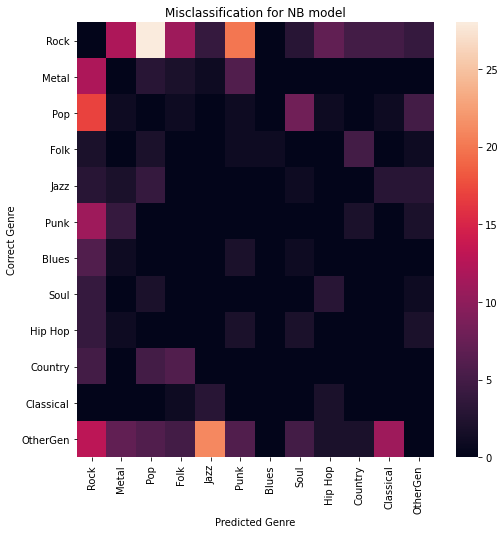

In [725]:
plt.figure(figsize=(8,8))
sns.heatmap(missclass)
plt.yticks(rotation=0)
plt.ylabel("Correct Genre")
plt.xlabel("Predicted Genre")
plt.title("Misclassification for NB model");

### K-Means clustering for getting "ML genres"

In [550]:
from sklearn.cluster import KMeans

In [551]:
x = dfs_ml[ml_music_desc].values
y = dfs_ml.main_gen.values
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state= 39)

In [552]:
k = 7
model = KMeans(n_clusters = k)
model.fit(x_train);

In [553]:
clust = pd.DataFrame(y_test).rename(columns = {0: "true_label"})
clust["clust_label"] = model.predict(x_test)

In [554]:
clusters = pd.DataFrame()

for c in range(k):
    clusters = pd.concat([clusters, pd.DataFrame(clust.true_label[clust.clust_label == c].value_counts(ascending = False)).rename(columns={"true_label": str(c)}).transpose()])

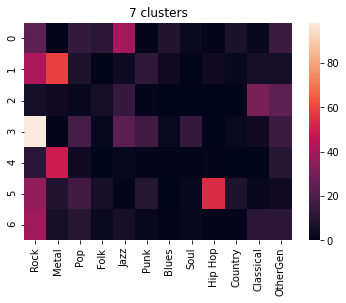

In [555]:
sns.heatmap(clusters[main_genres].fillna(0))
plt.title(str(k)+ " clusters");

#### Results

**For k = 5**
- Strong `Classical`/`OtherGen` (only one without a strong `Rock`)
- Strong `Jazz` + `Rock` + light others
- Strong `Metal` + `Rock` + light others
- Only `Metal` + `Rock` (exclusive)
- Extra Strong `Rock` +  medium `Hip Hop` + others (no `Metal`)

**For k = 6**
- Strong `Classical`/`OtherGen` (only one without a strong `Rock`)
- Strong `Jazz` + `Rock` + light others (no `Metal`)
- Strong `Metal` + `Rock` + light others
- Only `Metal` + `Rock` (exclusive)
- Extra Strong `Rock` + others (no `Metal`)
- *Strong `Hip Hop` + medium `Rock`*

**For k = 7**
- Strong `Classical`/`OtherGen` (only one without a strong `Rock`)
- Strong `Jazz` + *light `Rock`* + light others (no `Metal`)
- Strong `Metal` + `Rock` + light others
- Strong `Metal` + *light `Rock`* (exclusive)
- Extra Strong `Rock` + others (no `Metal`)
- Strong `Hip Hop` + medium `Rock`
- *Medium `Rock` + light others*

**After k = 8 we only get different variations of `Rock` + light something**

We can extrapolate that the most *distinctive* genres are:
- `Classical`
- `Hip Hop`
- `Jazz`
- `Metal` (with apparantly 2 subtypes)

With an extra mention to `Blues`, `Soul` and `Folk` that are clustered with other genres, but appear exclusively in one cluster (meaning that while they share similarities with other genres, they have a well defined characteristic sound). It's also worth noting that since they represent a much smaller fraction of the dataset, they're harder to be clustered on their own

As expected, `Rock` appeared in many clusters, this can be explained by the fact that it's by far the most popular genre (appearing a few times more than any other), and the fact that it has the most "subgenres", meaning that it has the most variation of characteristics whitin itself